### CanGo Internship assignment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('Call_Setup_Success_Rate_1month_hourly.csv')

In [8]:
df.shape

(3960, 1)

In [9]:
df.head()

,kpi$unit$kpi_id$ne_date$ne_hour$ne_id$value
0,Call Setup Success Rate$%$3561851598725308$201...
1,Call Setup Success Rate$%$3561851598725308$201...
2,Call Setup Success Rate$%$3561851598725308$201...
3,Call Setup Success Rate$%$3561851598725308$201...
4,Call Setup Success Rate$%$3561851598725308$201...


In [5]:
df.columns.str.split(pat='$')

Index([['kpi', 'unit', 'kpi_id', 'ne_date', 'ne_hour', 'ne_id', 'value']], dtype='object')

In [6]:
new_df = pd.DataFrame(columns=[i for i in np.squeeze(df.columns.str.split(pat='$'))])

### data organizer function

In [10]:
def data_corrector(df):
    
    new_df = pd.DataFrame(columns=[i for i in np.squeeze(df.columns.str.split(pat='$'))])
    for i in range(len(df)):
        row_data = list(df.iloc[i].str.split(pat="$"))
        squeezed_row = np.squeeze(row_data)
        new_df = new_df.append(pd.Series(squeezed_row, index=[i for i in np.squeeze(df.columns.str.split(pat='$'))]), ignore_index=True)
    return new_df

In [11]:
new_df = data_corrector(df)

In [14]:
new_df.head()

,kpi,unit,kpi_id,ne_date,ne_hour,ne_id,value
0,Call Setup Success Rate,%,3561851598725308,2018-10-01,0,MEXTLAMSS1,90.3200
1,Call Setup Success Rate,%,3561851598725308,2018-10-01,0,MEXTIJMSS1,94.9000
2,Call Setup Success Rate,%,3561851598725308,2018-10-01,0,MEXMTYMSS1,90.3400
3,Call Setup Success Rate,%,3561851598725308,2018-10-01,0,MEXMTYMSS2,92.8500
4,Call Setup Success Rate,%,3561851598725308,2018-10-01,0,MEXGDLMSS1,90.1700


#### Change dates to timestamp

In [15]:
def date_converter(date):
    return pd.datetime.strptime(date, '%Y-%m-%d')

In [16]:
new_df = pd.read_csv('new_df.csv', parse_dates=[3], date_parser=date_converter, index_col=[3])

In [40]:
new_df.head()

,kpi,unit,kpi_id,ne_hour,ne_id,value
ne_date,,,,,,
2018-10-01,Call Setup Success Rate,%,3561851598725308,0,MEXTLAMSS1,90.32
2018-10-01,Call Setup Success Rate,%,3561851598725308,0,MEXTIJMSS1,94.90
2018-10-01,Call Setup Success Rate,%,3561851598725308,0,MEXMTYMSS1,90.34
2018-10-01,Call Setup Success Rate,%,3561851598725308,0,MEXMTYMSS2,92.85
2018-10-01,Call Setup Success Rate,%,3561851598725308,0,MEXGDLMSS1,90.17


In [41]:
new_df.shape

(3960, 6)

### export the dataset

In [24]:
new_df.to_csv('new_df.csv', index=False)

### Simple data cleaning (if needed)

#### Checking for duplicates

In [25]:
sum(new_df.duplicated())

0

#### basic stats

In [26]:
new_df['ne_date'][0]

'2018-10-01'

In [4]:
new_df = pd.read_csv('new_df.csv',)

#### testing

##### The above date is a string so we need to convert it into date format for our time series prediction

In [27]:
def date_converter(date):
    return pd.datetime.strptime(date, '%Y-%m-%d')

In [28]:
new_df = pd.read_csv('new_df.csv', parse_dates=[3], date_parser=date_converter, index_col=[3])

In [29]:
new_df.head()

,kpi,unit,kpi_id,ne_hour,ne_id,value
ne_date,,,,,,
2018-10-01,Call Setup Success Rate,%,3561851598725308,0,MEXTLAMSS1,90.32
2018-10-01,Call Setup Success Rate,%,3561851598725308,0,MEXTIJMSS1,94.90
2018-10-01,Call Setup Success Rate,%,3561851598725308,0,MEXMTYMSS1,90.34
2018-10-01,Call Setup Success Rate,%,3561851598725308,0,MEXMTYMSS2,92.85
2018-10-01,Call Setup Success Rate,%,3561851598725308,0,MEXGDLMSS1,90.17


##### And now this is a timestamp instead of a string

##### We will first explore the entire dataset once and after this we will split datapoints based on network devices and will perform a in-depth analysis and prediction on data of each of the network device

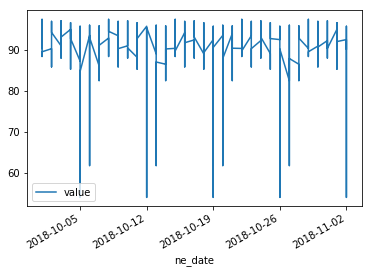

In [22]:
new_df.plot(y='value')

##### There is no clear trend in the graph, the time series graph of the data and we observe the data is stationary i.e the mean, variance and covariance are equal throughout different time steps. Still we will check using statistical methods to prove it.

In [33]:
from statsmodels.graphics.tsaplots import plot_acf

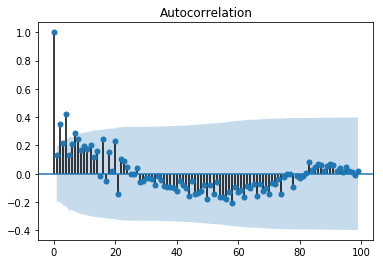

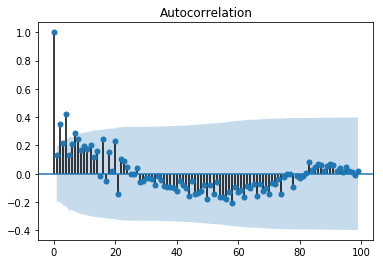

In [34]:
plot_acf(new_df['value'][:100])

##### But the autocorrelation plot shows a little bit of non stationarity in the data

### Getting data for each and every network device

In [35]:
split_df = new_df.groupby(by='ne_id')
split_df.describe()

kpi_id                                                       \
            count          mean        std           min           25%   
ne_id                                                                    
MEXGDLMSS1  792.0  3.561852e+15  18.011374  3.561852e+15  3.561852e+15   
MEXMTYMSS1  792.0  3.561852e+15  18.011374  3.561852e+15  3.561852e+15   
MEXMTYMSS2  792.0  3.561852e+15  18.011374  3.561852e+15  3.561852e+15   
MEXTIJMSS1  792.0  3.561852e+15  18.011374  3.561852e+15  3.561852e+15   
MEXTLAMSS1  792.0  3.561852e+15  18.011374  3.561852e+15  3.561852e+15   

                                                     ne_hour        ...    \
                     50%           75%           max   count  mean  ...     
ne_id                                                               ...     
MEXGDLMSS1  3.561852e+15  3.561852e+15  3.561852e+15   792.0  11.5  ...     
MEXMTYMSS1  3.561852e+15  3.561852e+15  3.561852e+15   792.0  11.5  ...     
MEXMTYMSS2  3.561852e+15  3.561852e+15  3.561852e+15   792.0  11.5  ...     
MEXTIJMSS1  3.561852e+15  3.561852e+15  3.561852e+15   792.0  11.5  ...     
MEXTLAMSS1  3.561852e+15  3.561852e+15  3.561852e+15   792.0  11.5  ...     

                         value                                             \
              75%   max  count       mean       std    min    25%     50%   
ne_id                                                                       
MEXGDLMSS1  17.25  23.0  792.0  91.166263  1.918872  77.80  90.45  91.540   
MEXMTYMSS1  17.25  23.0  792.0  89.602803  5.900741  54.03  89.75  91.120   
MEXMTYMSS2  17.25  23.0  792.0  92.566149  2.102929  87.01  91.18  92.680   
MEXTIJMSS1  17.25  23.0  792.0  92.554154  2.033690  86.61  91.24  92.755   
MEXTLAMSS1  17.25  23.0  792.0  91.065051  1.726271  82.48  90.57  91.450   

                          
              75%    max  
ne_id                     
MEXGDLMSS1  92.22  94.11  
MEXMTYMSS1  92.06  94.40  
MEXMTYMSS2  93.96  97.40  
MEXTIJMSS1  94.06  97.05  
MEXTLAMSS1  92.08  93.75  

[5 rows x 24 columns]

##### There are not a lot of major outliers in the data and the quantiles seem to fine which is a good sign

In [36]:
np.unique(new_df['ne_id'])

array(['MEXGDLMSS1', 'MEXMTYMSS1', 'MEXMTYMSS2', 'MEXTIJMSS1',
       'MEXTLAMSS1'], dtype=object)

### We will segeregate data based on network device

In [23]:
MEXGDLMSS1_df = new_df[new_df['ne_id'] == 'MEXGDLMSS1']

In [24]:
MEXGDLMSS1_df.head()

,kpi,unit,kpi_id,ne_hour,ne_id,value
ne_date,,,,,,
2018-10-01,Call Setup Success Rate,%,3561851598725308,0,MEXGDLMSS1,90.17
2018-10-01,Call Setup Success Rate,%,3561851598725308,1,MEXGDLMSS1,90.24
2018-10-01,Call Setup Success Rate,%,3561851598725308,2,MEXGDLMSS1,91.13
2018-10-01,Call Setup Success Rate,%,3561851598725308,3,MEXGDLMSS1,91.96
2018-10-01,Call Setup Success Rate,%,3561851598725308,4,MEXGDLMSS1,92.18


In [25]:
MEXGDLMSS1_df.shape

(792, 6)

In [26]:
MEXMTYMSS1_df = new_df[new_df['ne_id'] == 'MEXMTYMSS1']
print(MEXMTYMSS1_df.shape)
MEXMTYMSS1_df.head()

(792, 6)


,kpi,unit,kpi_id,ne_hour,ne_id,value
ne_date,,,,,,
2018-10-01,Call Setup Success Rate,%,3561851598725308,0,MEXMTYMSS1,90.34
2018-10-01,Call Setup Success Rate,%,3561851598725308,1,MEXMTYMSS1,91.57
2018-10-01,Call Setup Success Rate,%,3561851598725308,2,MEXMTYMSS1,91.15
2018-10-01,Call Setup Success Rate,%,3561851598725308,3,MEXMTYMSS1,91.67
2018-10-01,Call Setup Success Rate,%,3561851598725308,4,MEXMTYMSS1,92.49


In [27]:
MEXMTYMSS2_df = new_df[new_df['ne_id'] == 'MEXMTYMSS2']
print(MEXMTYMSS2_df.shape)
MEXMTYMSS2_df.head()

(792, 6)


,kpi,unit,kpi_id,ne_hour,ne_id,value
ne_date,,,,,,
2018-10-01,Call Setup Success Rate,%,3561851598725308,0,MEXMTYMSS2,92.85
2018-10-01,Call Setup Success Rate,%,3561851598725308,1,MEXMTYMSS2,91.22
2018-10-01,Call Setup Success Rate,%,3561851598725308,2,MEXMTYMSS2,92.71
2018-10-01,Call Setup Success Rate,%,3561851598725308,3,MEXMTYMSS2,94.76
2018-10-01,Call Setup Success Rate,%,3561851598725308,4,MEXMTYMSS2,97.40


In [28]:
MEXTIJMSS1_df = new_df[new_df['ne_id'] == 'MEXTIJMSS1']
print(MEXTIJMSS1_df.shape)
MEXTIJMSS1_df.head()

(792, 6)


,kpi,unit,kpi_id,ne_hour,ne_id,value
ne_date,,,,,,
2018-10-01,Call Setup Success Rate,%,3561851598725308,0,MEXTIJMSS1,94.90
2018-10-01,Call Setup Success Rate,%,3561851598725308,1,MEXTIJMSS1,94.73
2018-10-01,Call Setup Success Rate,%,3561851598725308,2,MEXTIJMSS1,95.09
2018-10-01,Call Setup Success Rate,%,3561851598725308,3,MEXTIJMSS1,95.44
2018-10-01,Call Setup Success Rate,%,3561851598725308,4,MEXTIJMSS1,94.66


In [29]:
MEXTLAMSS1_df = new_df[new_df['ne_id'] == 'MEXTLAMSS1']
print(MEXTLAMSS1_df.shape)
MEXTLAMSS1_df.head()

(792, 6)


,kpi,unit,kpi_id,ne_hour,ne_id,value
ne_date,,,,,,
2018-10-01,Call Setup Success Rate,%,3561851598725308,0,MEXTLAMSS1,90.32
2018-10-01,Call Setup Success Rate,%,3561851598725308,1,MEXTLAMSS1,92.33
2018-10-01,Call Setup Success Rate,%,3561851598725308,2,MEXTLAMSS1,92.45
2018-10-01,Call Setup Success Rate,%,3561851598725308,3,MEXTLAMSS1,92.33
2018-10-01,Call Setup Success Rate,%,3561851598725308,4,MEXTLAMSS1,90.24


### Lets export all the induvidual datasets

In [ ]:
MEXGDLMSS1_df.to_csv('MEXGDLMSS1_df.csv', index=False)
MEXMTYMSS1_df.to_csv('MEXMTYMSS1_df.csv', index=False)
MEXMTYMSS2_df.to_csv('MEXMTYMSS2_df.csv', index=False)
MEXTIJMSS1_df.to_csv('MEXTIJMSS1_df.csv', index=False)
MEXTLAMSS1_df.to_csv('MEXTLAMSS1_df.csv', index=False)

## Working with data

### Network device MEXGDLMSS1

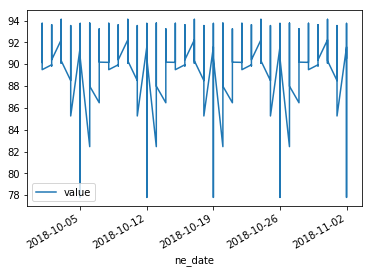

In [51]:
MEXGDLMSS1_df.plot(y='value')

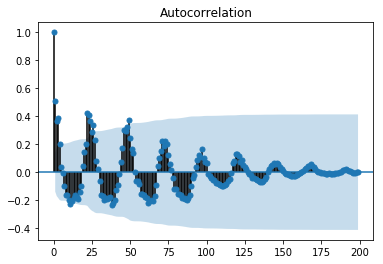

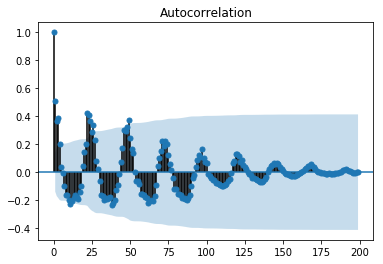

In [52]:
plot_acf(MEXGDLMSS1_df['value'][:200])

##### So its almost stationary i.e mean, variance and covariance at different time intervals are almost equal and hence we can apply time series forecasting models such as ARMA, ARIMA etc etc

In [53]:
MEXGDLMSS1_df_diff = MEXGDLMSS1_df['value'].diff(periods=1)

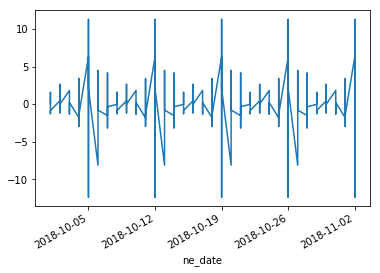

In [54]:
MEXGDLMSS1_df_diff.plot(y='value')

In [55]:
MEXGDLMSS1_df_diff = pd.DataFrame(MEXGDLMSS1_df_diff, columns=['date', 'value'])
MEXGDLMSS1_df_diff.drop(columns=['date'], axis=1, inplace=True)

In [56]:
MEXGDLMSS1_df_diff.head()

,value
ne_date,
2018-10-01,NaN
2018-10-01,0.07
2018-10-01,0.89
2018-10-01,0.83
2018-10-01,0.22


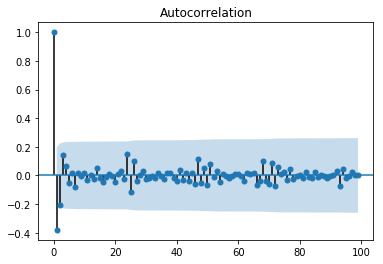

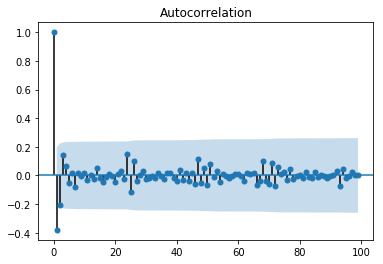

In [57]:
plot_acf(MEXGDLMSS1_df_diff[1:][:100])

##### This is perfectly stationary

### MEXMTYMSS1_df network device

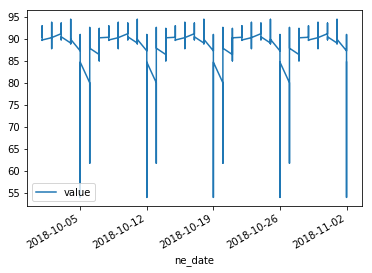

In [59]:
MEXMTYMSS1_df.plot(y='value'[:100])

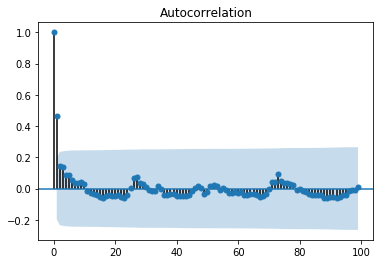

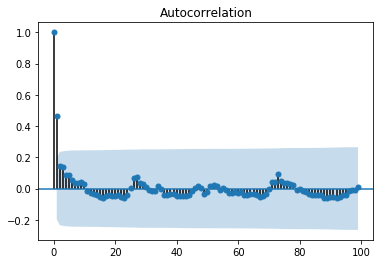

In [60]:
plot_acf(MEXMTYMSS1_df['value'][:100])

##### This is also close to being stationary

In [61]:
MEXMTYMSS1_df_diff = MEXMTYMSS1_df['value'].diff(periods=1)

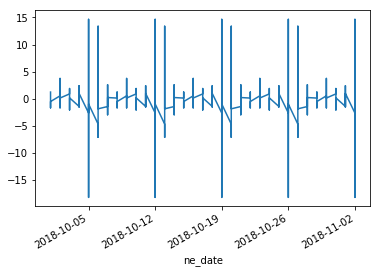

In [62]:
MEXMTYMSS1_df_diff.plot(y='value')

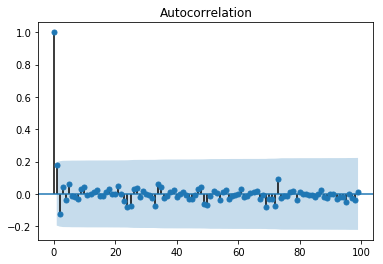

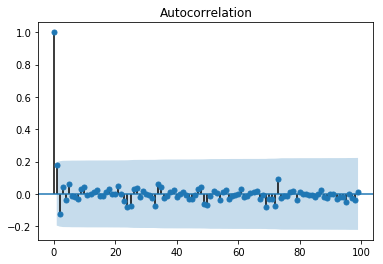

In [63]:
plot_acf(MEXMTYMSS1_df_diff[1:][:100])

##### perfectly stationary

### MEXMTYMSS2_df network device

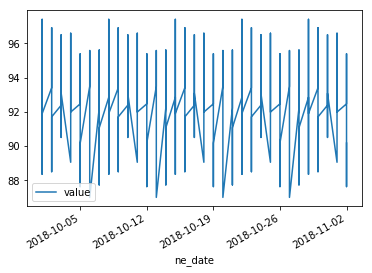

In [65]:
MEXMTYMSS2_df.plot(y='value'[:100])

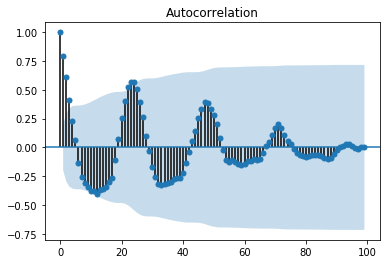

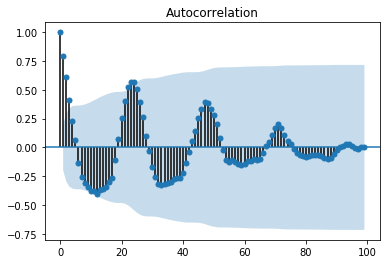

In [66]:
plot_acf(MEXMTYMSS2_df['value'][:100])

##### This is not anywhere close to being stationary. So the only way here is to use to autocorrelation stuff

In [67]:
MEXMTYMSS2_df_diff = MEXMTYMSS2_df['value'].diff(periods=1)

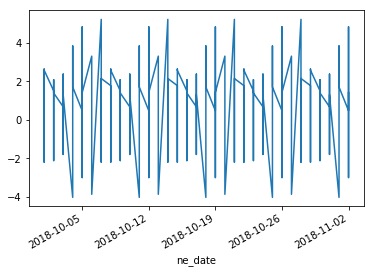

In [68]:
MEXMTYMSS2_df_diff.plot(y='value')

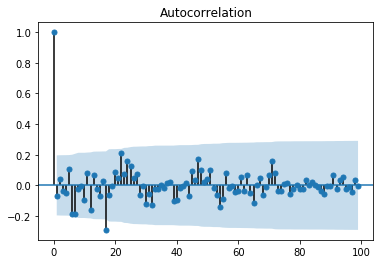

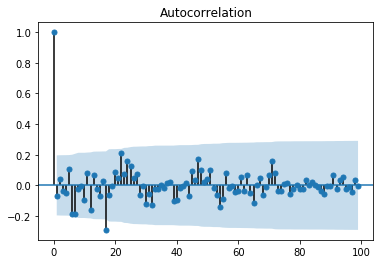

In [69]:
plot_acf(MEXMTYMSS2_df_diff[1:][:100])

##### perfectly stationary

### MEXTIJMSS1_df network device

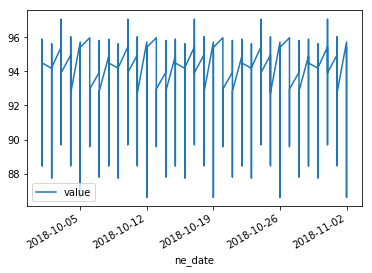

In [71]:
MEXTIJMSS1_df.plot(y='value'[:100])

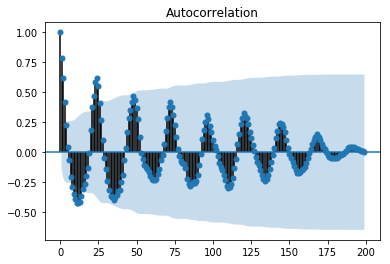

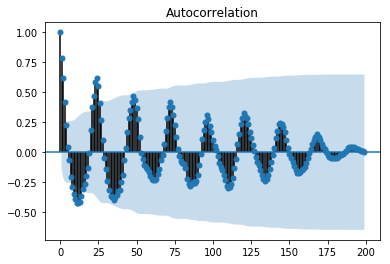

In [72]:
plot_acf(MEXTIJMSS1_df['value'][:200])

##### This is also close to being stationary

In [73]:
MEXTIJMSS1_df_dff = MEXTIJMSS1_df['value'].diff(periods=1)

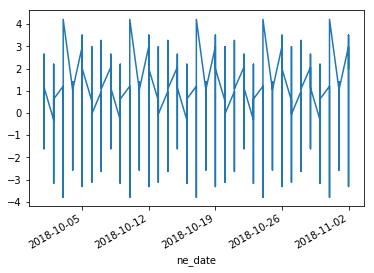

In [74]:
MEXTIJMSS1_df_dff.plot(y='value')

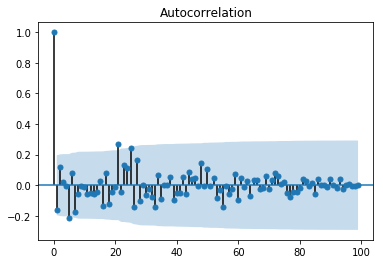

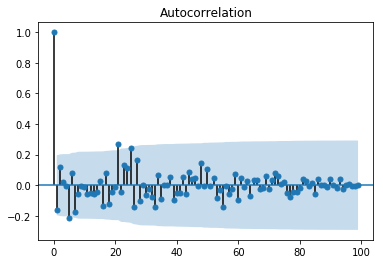

In [75]:
plot_acf(MEXTIJMSS1_df_dff[1:][:100])

##### perfectly stationary

### MEXTLAMSS1_df network device

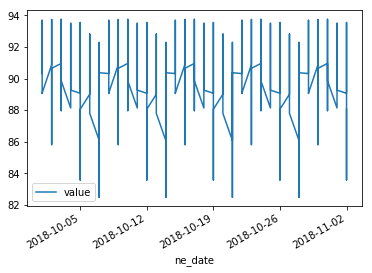

In [77]:
MEXTLAMSS1_df.plot(y='value'[:100])

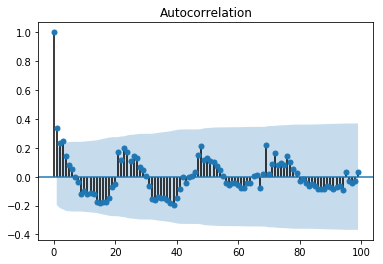

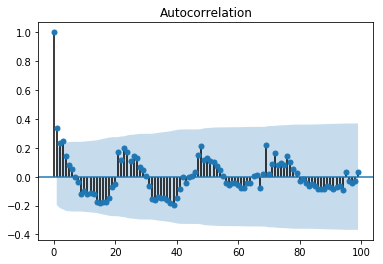

In [78]:
plot_acf(MEXTLAMSS1_df['value'][:100])

##### This is also close to being stationary

In [79]:
MEXTLAMSS1_df_dff = MEXTLAMSS1_df['value'].diff(periods=1)

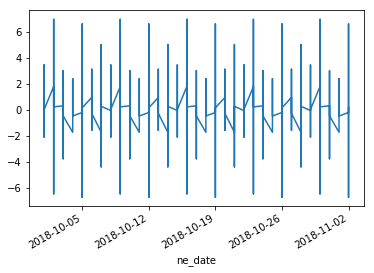

In [80]:
MEXTLAMSS1_df_dff.plot(y='value')

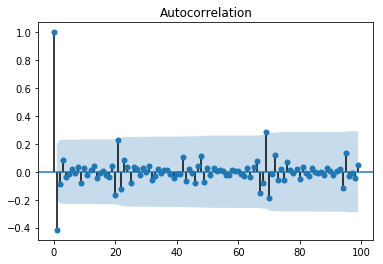

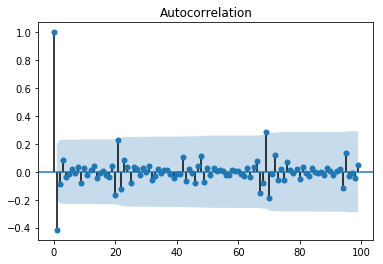

In [81]:
plot_acf(MEXTLAMSS1_df_dff[1:][:100])

##### perfectly stationary

## Modelling

#### Network device = MEXGDLMSS1

##### Here we are doing time based splitting. i.e we put the oldest 80% data as train and the newest 20% as test as the model is going to predict for future and hence need to be fed with newest data which will closely model the future data

In [31]:
MEXGDLMSS1_x_train = MEXGDLMSS1_df[0:int(np.round(0.8*MEXGDLMSS1_df.shape[0]))]
MEXGDLMSS1_x_test = MEXGDLMSS1_df[int(np.round(0.8*MEXGDLMSS1_df.shape[0])):]

In [32]:
print(str(MEXGDLMSS1_x_train.shape) + ' is the size of train data')
print(str(MEXGDLMSS1_x_test.shape) + ' is the size of test data')

(634, 6) is the size of train data
(158, 6) is the size of test data


In [33]:
MEXGDLMSS1_x_train.head()

,kpi,unit,kpi_id,ne_hour,ne_id,value
ne_date,,,,,,
2018-10-01,Call Setup Success Rate,%,3561851598725308,0,MEXGDLMSS1,90.17
2018-10-01,Call Setup Success Rate,%,3561851598725308,1,MEXGDLMSS1,90.24
2018-10-01,Call Setup Success Rate,%,3561851598725308,2,MEXGDLMSS1,91.13
2018-10-01,Call Setup Success Rate,%,3561851598725308,3,MEXGDLMSS1,91.96
2018-10-01,Call Setup Success Rate,%,3561851598725308,4,MEXGDLMSS1,92.18


In [48]:
MEXGDLMSS1_x_train = MEXGDLMSS1_x_train.drop(columns=['kpi', 'unit', 'kpi_id', 'ne_hour', 'ne_id'])

## Simple AR Model

In [49]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA

In [50]:
MEXGDLMSS1_x_train.head()

,value
ne_date,
2018-10-01,90.17
2018-10-01,90.24
2018-10-01,91.13
2018-10-01,91.96
2018-10-01,92.18


In [51]:
model_ar = AR(MEXGDLMSS1_x_train)
model_ar_fit = model_ar.fit()

C:\Users\karth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [52]:
MEXGDLMSS1_pred = (model_ar_fit.predict(start=634, end=791))

C:\Users\karth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [53]:
MEXGDLMSS1_pred.values[:10]

array([91.85479013, 92.26073341, 91.7485111 , 91.17972818, 90.77289361,
       91.08951199, 92.18544221, 91.84174396, 91.83301036, 89.77164584])

In [54]:
MEXGDLMSS1_x_test = MEXGDLMSS1_x_test.drop(columns=['kpi', 'unit', 'kpi_id', 'ne_hour', 'ne_id'])

### Plots comparing actual and predicted

In [55]:
actual = np.array(MEXGDLMSS1_x_test['value'])
predicted = MEXGDLMSS1_pred.values

In [56]:
print(actual.shape)
print(predicted.shape)

(158,)
(158,)


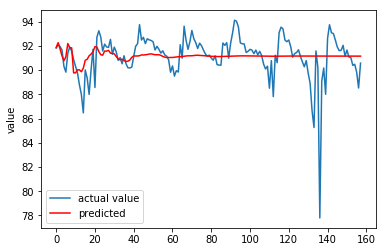

In [59]:
plt.plot(actual, label='actual value')
plt.plot(predicted, color='red', label='predicted')
plt.ylabel('value')
plt.legend()

##### The above graph shows the AR model clearly did not understand our data well. We will try various other models next

## ARIMA Model

In [60]:
#The three values are for AR model, Integrated order and moving average values

model_arima = ARIMA(MEXGDLMSS1_x_train, order=(3,1,6))
model_arima_fit = model_arima.fit(start_ar_lags=13)
print('the aic score is ', model_arima_fit.aic)

C:\Users\karth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\karth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


the aic score is  2412.0236755722703


In [61]:
MEXGDLMSS1_pred = (model_arima_fit.forecast(steps=158))

In [62]:
predicted = MEXGDLMSS1_pred[0]

In [127]:
# MEXGDLMSS1_x_test = MEXGDLMSS1_x_test.drop(columns=['kpi', 'unit', 'kpi_id', 'ne_hour', 'ne_id'])

### Plots comparing actual and predicted

In [63]:
actual = np.array(MEXGDLMSS1_x_test['value'])
# predicted = MEXGDLMSS1_pred.values

In [64]:
print(actual.shape)
print(predicted.shape)

(158,)
(158,)


Text(0,0.5,'value')

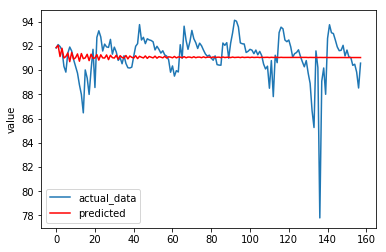

In [66]:
plt.plot(actual, label='actual_data')
plt.plot(predicted, color='red', label='predicted')
plt.legend()
plt.ylabel('value')

##### OK, Even ARIMA was not able to capture the dynamics in the data. Now lets start exploring Machine learning models

### Now we will try and work with machine learning algorithms

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
df = pd.read_csv('new_df.csv')

In [3]:
df.head()

,kpi,unit,kpi_id,ne_date,ne_hour,ne_id,value
0,Call Setup Success Rate,%,3561851598725308,2018-10-01,0,MEXTLAMSS1,90.32
1,Call Setup Success Rate,%,3561851598725308,2018-10-01,0,MEXTIJMSS1,94.90
2,Call Setup Success Rate,%,3561851598725308,2018-10-01,0,MEXMTYMSS1,90.34
3,Call Setup Success Rate,%,3561851598725308,2018-10-01,0,MEXMTYMSS2,92.85
4,Call Setup Success Rate,%,3561851598725308,2018-10-01,0,MEXGDLMSS1,90.17


### Converting hours to hh:mm:ss

In [4]:
x = {0:'00:00:00', 1:'00:01:00', 2:'00:02:00', 3:'00:03:00', 4:'00:04:00', 5:'00:05:00',\
    6:'00:06:00', 7:'00:07:00', 8:'00:08:00', 9:'00:09:00', 10:'00:10:00', 11:'00:11:00',\
    12:'00:12:00', 13:'00:13:00', 14:'00:14:00', 15:'00:15:00', 16:'00:16:00', 17:'00:17:00',\
    18:'00:18:00', 19:'00:19:00', 20:'00:20:00', 21:'00:21:00', 22:'00:22:00', 23:'00:23:00'}

In [5]:
for index, val in enumerate(df['ne_hour']):
    df.ne_hour[index] = x[val]

C:\Users\karth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\karth\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
df.head()

,kpi,unit,kpi_id,ne_date,ne_hour,ne_id,value
0,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:00:00,MEXTLAMSS1,90.32
1,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:00:00,MEXTIJMSS1,94.90
2,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:00:00,MEXMTYMSS1,90.34
3,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:00:00,MEXMTYMSS2,92.85
4,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:00:00,MEXGDLMSS1,90.17


In [8]:
pd.to_datetime(df['ne_date'] + ' ' + df['ne_hour']).values

array(['2018-10-01T00:00:00.000000000', '2018-10-01T00:00:00.000000000',
       '2018-10-01T00:00:00.000000000', ...,
       '2018-11-02T00:23:00.000000000', '2018-11-02T00:23:00.000000000',
       '2018-11-02T00:23:00.000000000'], dtype='datetime64[ns]')

In [9]:
df['datetime'] = pd.to_datetime(df['ne_date'] + ' ' + df['ne_hour']).values

In [75]:
df.to_csv('new_df_datetime.csv', index_label='datetime', index=False)

In [17]:
new_df_datetime = pd.read_csv('new_df_datetime.csv',)

In [42]:
new_df_datetime.head()

,kpi,unit,kpi_id,ne_date,ne_hour,ne_id,value,datetime
0,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:00:00,MEXTLAMSS1,90.32,2018-10-01 00:00:00
1,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:00:00,MEXTIJMSS1,94.90,2018-10-01 00:00:00
2,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:00:00,MEXMTYMSS1,90.34,2018-10-01 00:00:00
3,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:00:00,MEXMTYMSS2,92.85,2018-10-01 00:00:00
4,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:00:00,MEXGDLMSS1,90.17,2018-10-01 00:00:00


### Converting our date to timestamp with required format

In [16]:
def date_parser(date):
    return datetime.strptime(date, '%Y-%m-%d %H:%M:%S')

In [111]:
dates = pd.read_csv('new_df_datetime.csv', parse_dates=[7], date_parser=date_parser)

In [112]:
dates.head()

,kpi,unit,kpi_id,ne_date,ne_hour,ne_id,value,datetime
0,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:00:00,MEXTLAMSS1,90.32,2018-10-01
1,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:00:00,MEXTIJMSS1,94.90,2018-10-01
2,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:00:00,MEXMTYMSS1,90.34,2018-10-01
3,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:00:00,MEXMTYMSS2,92.85,2018-10-01
4,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:00:00,MEXGDLMSS1,90.17,2018-10-01


##### So the datetime column of the dates dataframe is a time stamp containing hour info. Here we are trying to set our date as our index in a new way. Also Im exploring whether adding time along with date as index will improve our predictions. This is because our previous models created with AR and ARIMA performed poorly than expected. Here we will try this new and small experiment

In [115]:
dates = dates.set_index(pd.DatetimeIndex(dates['datetime']))

In [124]:
dates.shape

(3960, 8)

#### Problem is when I export the dataframe the timestamp gets converted into string when reading it from disk after exporting. But thats ok, We will work with the created dataframe rather than exporting and reloading the same. Below is the experiment that supports my claim

In [57]:
dates.to_csv('timestamp_dates_final.csv', index=False)

In [58]:
timestamp_dates = pd.read_csv('timestamp_dates_final.csv', index_col=7)

In [71]:
timestamp_dates.head()

,kpi,unit,kpi_id,ne_date,ne_hour,ne_id,value
datetime,,,,,,,
2018-10-01 00:00:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:00:00,MEXTLAMSS1,90.32
2018-10-01 00:00:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:00:00,MEXTIJMSS1,94.90
2018-10-01 00:00:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:00:00,MEXMTYMSS1,90.34
2018-10-01 00:00:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:00:00,MEXMTYMSS2,92.85
2018-10-01 00:00:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:00:00,MEXGDLMSS1,90.17


In [63]:
timestamp_dates.dtypes

kpi         object
unit        object
kpi_id       int64
ne_date     object
ne_hour     object
ne_id       object
value      float64
dtype: object

## Modelling with dates dataframe

In [127]:
dates.head()

,kpi,unit,kpi_id,ne_date,ne_hour,ne_id,value,datetime
datetime,,,,,,,,
2018-10-01,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:00:00,MEXTLAMSS1,90.32,2018-10-01
2018-10-01,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:00:00,MEXTIJMSS1,94.90,2018-10-01
2018-10-01,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:00:00,MEXMTYMSS1,90.34,2018-10-01
2018-10-01,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:00:00,MEXMTYMSS2,92.85,2018-10-01
2018-10-01,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:00:00,MEXGDLMSS1,90.17,2018-10-01


### We will split datasets for each network device

### Getting data for each and every network device

In [86]:
split_df = dates.groupby(by='ne_id')
split_df.describe()

kpi_id                                                       \
            count          mean        std           min           25%   
ne_id                                                                    
MEXGDLMSS1  792.0  3.561852e+15  18.011374  3.561852e+15  3.561852e+15   
MEXMTYMSS1  792.0  3.561852e+15  18.011374  3.561852e+15  3.561852e+15   
MEXMTYMSS2  792.0  3.561852e+15  18.011374  3.561852e+15  3.561852e+15   
MEXTIJMSS1  792.0  3.561852e+15  18.011374  3.561852e+15  3.561852e+15   
MEXTLAMSS1  792.0  3.561852e+15  18.011374  3.561852e+15  3.561852e+15   

                                                      value             \
                     50%           75%           max  count       mean   
ne_id                                                                    
MEXGDLMSS1  3.561852e+15  3.561852e+15  3.561852e+15  792.0  91.166263   
MEXMTYMSS1  3.561852e+15  3.561852e+15  3.561852e+15  792.0  89.602803   
MEXMTYMSS2  3.561852e+15  3.561852e+15  3.561852e+15  792.0  92.566149   
MEXTIJMSS1  3.561852e+15  3.561852e+15  3.561852e+15  792.0  92.554154   
MEXTLAMSS1  3.561852e+15  3.561852e+15  3.561852e+15  792.0  91.065051   

                                                          
                 std    min    25%     50%    75%    max  
ne_id                                                     
MEXGDLMSS1  1.918872  77.80  90.45  91.540  92.22  94.11  
MEXMTYMSS1  5.900741  54.03  89.75  91.120  92.06  94.40  
MEXMTYMSS2  2.102929  87.01  91.18  92.680  93.96  97.40  
MEXTIJMSS1  2.033690  86.61  91.24  92.755  94.06  97.05  
MEXTLAMSS1  1.726271  82.48  90.57  91.450  92.08  93.75

##### There are not a lot of major outliers in the data and the quantiles seem to fine which is a good sign

In [88]:
MEXGDLMSS1_df = dates[dates['ne_id'] == 'MEXGDLMSS1']

In [89]:
MEXGDLMSS1_df.head()

,kpi,unit,kpi_id,ne_date,ne_hour,ne_id,value,datetime
datetime,,,,,,,,
2018-10-01 00:00:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:00:00,MEXGDLMSS1,90.17,2018-10-01 00:00:00
2018-10-01 00:01:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:01:00,MEXGDLMSS1,90.24,2018-10-01 00:01:00
2018-10-01 00:02:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:02:00,MEXGDLMSS1,91.13,2018-10-01 00:02:00
2018-10-01 00:03:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:03:00,MEXGDLMSS1,91.96,2018-10-01 00:03:00
2018-10-01 00:04:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:04:00,MEXGDLMSS1,92.18,2018-10-01 00:04:00


In [91]:
MEXMTYMSS1_df = dates[dates['ne_id'] == 'MEXMTYMSS1']
print(MEXMTYMSS1_df.shape)
MEXMTYMSS1_df.head()

(792, 8)


,kpi,unit,kpi_id,ne_date,ne_hour,ne_id,value,datetime
datetime,,,,,,,,
2018-10-01 00:00:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:00:00,MEXMTYMSS1,90.34,2018-10-01 00:00:00
2018-10-01 00:01:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:01:00,MEXMTYMSS1,91.57,2018-10-01 00:01:00
2018-10-01 00:02:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:02:00,MEXMTYMSS1,91.15,2018-10-01 00:02:00
2018-10-01 00:03:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:03:00,MEXMTYMSS1,91.67,2018-10-01 00:03:00
2018-10-01 00:04:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:04:00,MEXMTYMSS1,92.49,2018-10-01 00:04:00


In [92]:
MEXMTYMSS2_df = dates[dates['ne_id'] == 'MEXMTYMSS2']
print(MEXMTYMSS2_df.shape)
MEXMTYMSS2_df.head()

(792, 8)


,kpi,unit,kpi_id,ne_date,ne_hour,ne_id,value,datetime
datetime,,,,,,,,
2018-10-01 00:00:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:00:00,MEXMTYMSS2,92.85,2018-10-01 00:00:00
2018-10-01 00:01:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:01:00,MEXMTYMSS2,91.22,2018-10-01 00:01:00
2018-10-01 00:02:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:02:00,MEXMTYMSS2,92.71,2018-10-01 00:02:00
2018-10-01 00:03:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:03:00,MEXMTYMSS2,94.76,2018-10-01 00:03:00
2018-10-01 00:04:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:04:00,MEXMTYMSS2,97.40,2018-10-01 00:04:00


In [93]:
MEXTIJMSS1_df = dates[dates['ne_id'] == 'MEXTIJMSS1']
print(MEXTIJMSS1_df.shape)
MEXTIJMSS1_df.head()

(792, 8)


,kpi,unit,kpi_id,ne_date,ne_hour,ne_id,value,datetime
datetime,,,,,,,,
2018-10-01 00:00:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:00:00,MEXTIJMSS1,94.90,2018-10-01 00:00:00
2018-10-01 00:01:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:01:00,MEXTIJMSS1,94.73,2018-10-01 00:01:00
2018-10-01 00:02:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:02:00,MEXTIJMSS1,95.09,2018-10-01 00:02:00
2018-10-01 00:03:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:03:00,MEXTIJMSS1,95.44,2018-10-01 00:03:00
2018-10-01 00:04:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:04:00,MEXTIJMSS1,94.66,2018-10-01 00:04:00


In [94]:
MEXTLAMSS1_df = dates[dates['ne_id'] == 'MEXTLAMSS1']
print(MEXTLAMSS1_df.shape)
MEXTLAMSS1_df.head()

(792, 8)


,kpi,unit,kpi_id,ne_date,ne_hour,ne_id,value,datetime
datetime,,,,,,,,
2018-10-01 00:00:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:00:00,MEXTLAMSS1,90.32,2018-10-01 00:00:00
2018-10-01 00:01:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:01:00,MEXTLAMSS1,92.33,2018-10-01 00:01:00
2018-10-01 00:02:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:02:00,MEXTLAMSS1,92.45,2018-10-01 00:02:00
2018-10-01 00:03:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:03:00,MEXTLAMSS1,92.33,2018-10-01 00:03:00
2018-10-01 00:04:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:04:00,MEXTLAMSS1,90.24,2018-10-01 00:04:00


### Lets export all the induvidual datasets

In [99]:
MEXGDLMSS1_df.to_csv('MEXGDLMSS1_df_date_time.csv', index=False)
MEXMTYMSS1_df.to_csv('MEXMTYMSS1_df_date_time.csv', index=False)
MEXMTYMSS2_df.to_csv('MEXMTYMSS2_df_date_time.csv', index=False)
MEXTIJMSS1_df.to_csv('MEXTIJMSS1_df_date_time.csv', index=False)
MEXTLAMSS1_df.to_csv('MEXTLAMSS1_df_date_time.csv', index=False)

### Network device MEXGDLMSS1

In [ ]:
MEXGDLMSS1_df.drop(columns=['datetime'])

In [100]:
MEXGDLMSS1_df.head()

,kpi,unit,kpi_id,ne_date,ne_hour,ne_id,value,datetime
datetime,,,,,,,,
2018-10-01 00:00:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:00:00,MEXGDLMSS1,90.17,2018-10-01 00:00:00
2018-10-01 00:01:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:01:00,MEXGDLMSS1,90.24,2018-10-01 00:01:00
2018-10-01 00:02:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:02:00,MEXGDLMSS1,91.13,2018-10-01 00:02:00
2018-10-01 00:03:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:03:00,MEXGDLMSS1,91.96,2018-10-01 00:03:00
2018-10-01 00:04:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:04:00,MEXGDLMSS1,92.18,2018-10-01 00:04:00


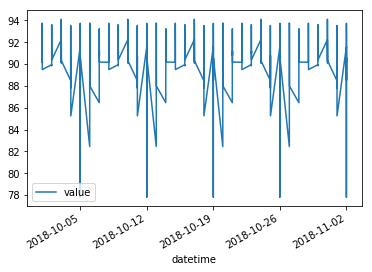

In [131]:
#new data with the hour field along with date in the index
MEXGDLMSS1_df[:].plot(y='value')

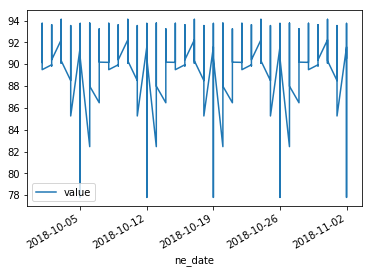

In [51]:
#old plots without the hour field in the index
MEXGDLMSS1_df.plot(y='value')

### acplots

In [133]:
from statsmodels.graphics.tsaplots import plot_acf

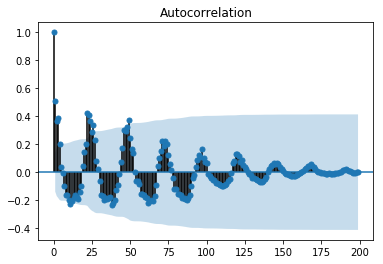

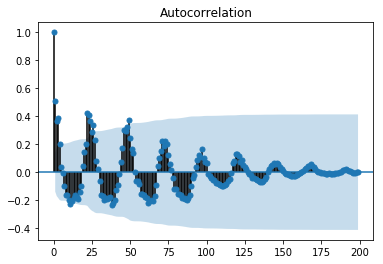

In [134]:
#new data with the hour field along with date in the index
plot_acf(MEXGDLMSS1_df['value'][:200])

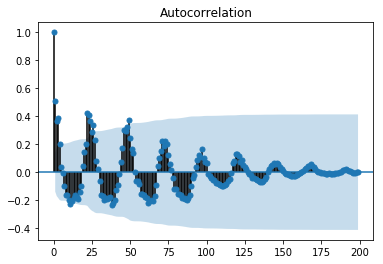

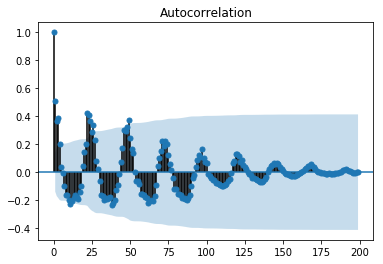

In [52]:
#old plots without the hour field in the index
plot_acf(MEXGDLMSS1_df['value'][:200])

##### So its almost stationary i.e mean, variance and covariance at different time intervals are almost equal and hence we can apply time series forecasting models such as ARMA, ARIMA etc etc

##### Again the new plots with hour feature looks same with the one without hour feature along with datetime and hence we conclude that adding hour feature along with date time doesnot change the model in anyway and doesnt improve improve the predictions also

In [53]:
MEXGDLMSS1_df_diff = MEXGDLMSS1_df['value'].diff(periods=1)

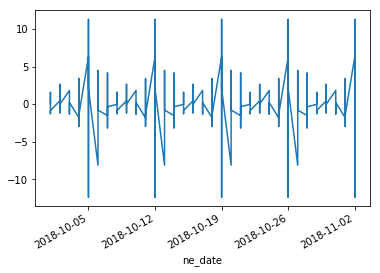

In [54]:
MEXGDLMSS1_df_diff.plot(y='value')

In [55]:
MEXGDLMSS1_df_diff = pd.DataFrame(MEXGDLMSS1_df_diff, columns=['date', 'value'])
MEXGDLMSS1_df_diff.drop(columns=['date'], axis=1, inplace=True)

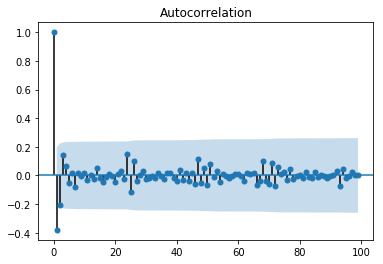

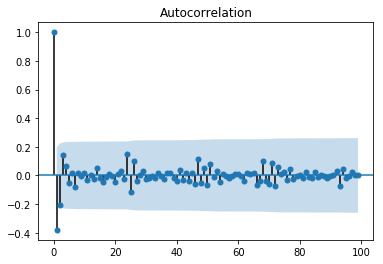

In [57]:
plot_acf(MEXGDLMSS1_df_diff[1:][:100])

##### This is perfectly stationary

### MEXMTYMSS1_df network device

In [58]:
np.unique(new_df['ne_id'])

array(['MEXGDLMSS1', 'MEXMTYMSS1', 'MEXMTYMSS2', 'MEXTIJMSS1',
       'MEXTLAMSS1'], dtype=object)

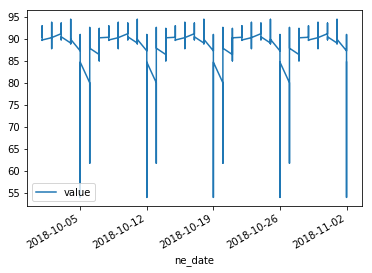

In [59]:
MEXMTYMSS1_df.plot(y='value'[:100])

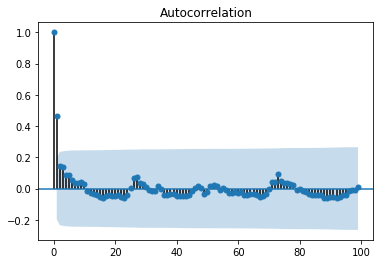

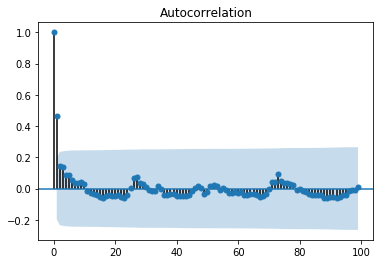

In [60]:
plot_acf(MEXMTYMSS1_df['value'][:100])

##### This is also close to being stationary

In [61]:
MEXMTYMSS1_df_diff = MEXMTYMSS1_df['value'].diff(periods=1)

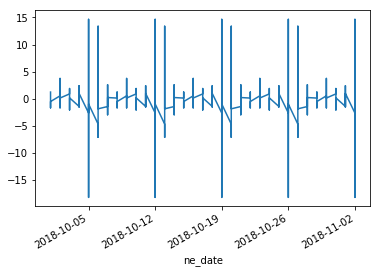

In [62]:
MEXMTYMSS1_df_diff.plot(y='value')

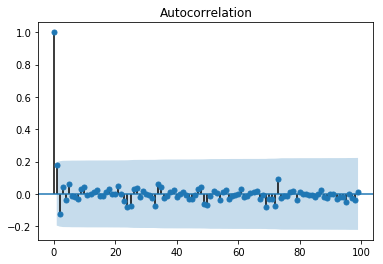

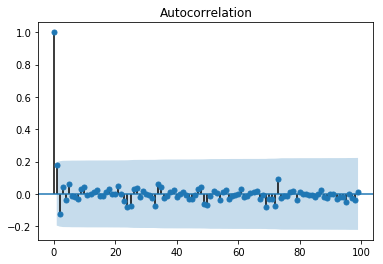

In [63]:
plot_acf(MEXMTYMSS1_df_diff[1:][:100])

##### perfectly stationary

### MEXMTYMSS2_df network device

In [64]:
np.unique(new_df['ne_id'])

array(['MEXGDLMSS1', 'MEXMTYMSS1', 'MEXMTYMSS2', 'MEXTIJMSS1',
       'MEXTLAMSS1'], dtype=object)

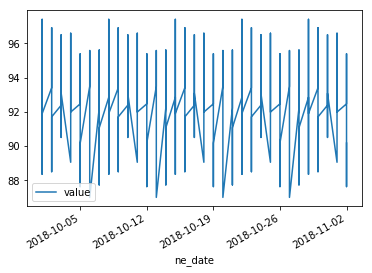

In [65]:
MEXMTYMSS2_df.plot(y='value'[:100])

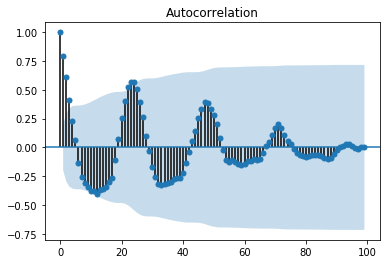

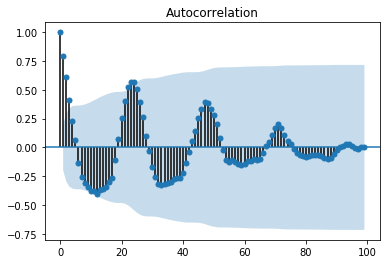

In [66]:
plot_acf(MEXMTYMSS2_df['value'][:100])

##### This is not anywhere close to being stationary. So the only way here is to use to autocorrelation stuff

In [67]:
MEXMTYMSS2_df_diff = MEXMTYMSS2_df['value'].diff(periods=1)

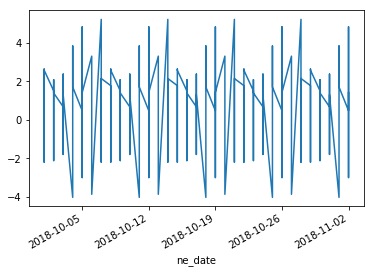

In [68]:
MEXMTYMSS2_df_diff.plot(y='value')

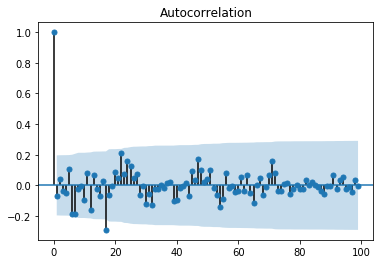

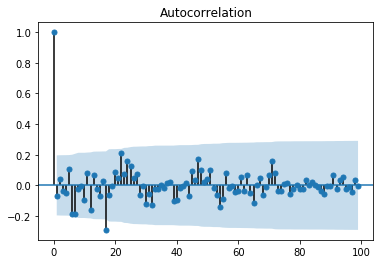

In [69]:
plot_acf(MEXMTYMSS2_df_diff[1:][:100])

##### perfectly stationary

### MEXTIJMSS1_df network device

In [70]:
np.unique(new_df['ne_id'])

array(['MEXGDLMSS1', 'MEXMTYMSS1', 'MEXMTYMSS2', 'MEXTIJMSS1',
       'MEXTLAMSS1'], dtype=object)

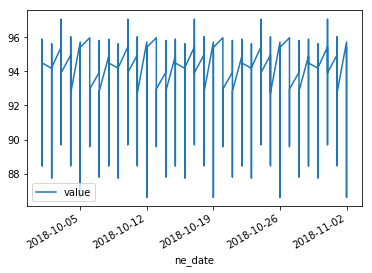

In [71]:
MEXTIJMSS1_df.plot(y='value'[:100])

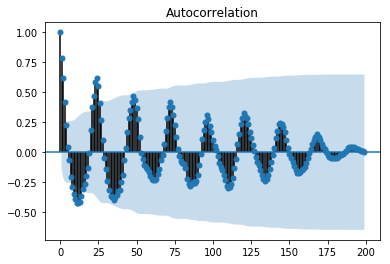

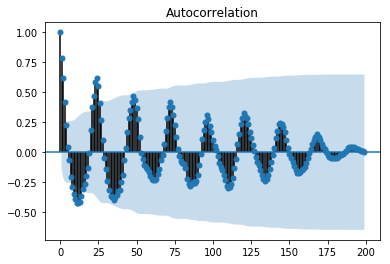

In [72]:
plot_acf(MEXTIJMSS1_df['value'][:200])

##### This is also close to being stationary

In [73]:
MEXTIJMSS1_df_dff = MEXTIJMSS1_df['value'].diff(periods=1)

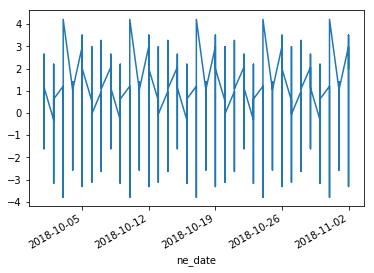

In [74]:
MEXTIJMSS1_df_dff.plot(y='value')

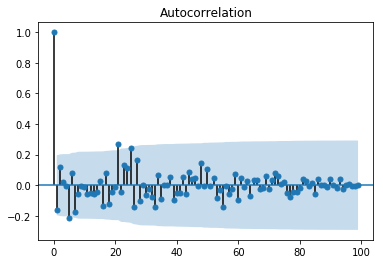

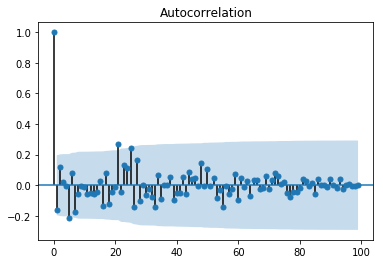

In [75]:
plot_acf(MEXTIJMSS1_df_dff[1:][:100])

##### perfectly stationary

### MEXTLAMSS1_df network device

In [76]:
np.unique(new_df['ne_id'])

array(['MEXGDLMSS1', 'MEXMTYMSS1', 'MEXMTYMSS2', 'MEXTIJMSS1',
       'MEXTLAMSS1'], dtype=object)

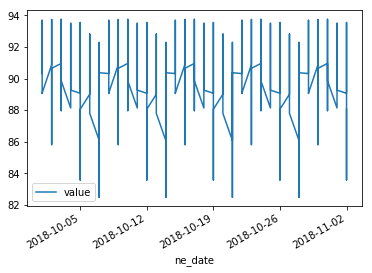

In [77]:
MEXTLAMSS1_df.plot(y='value'[:100])

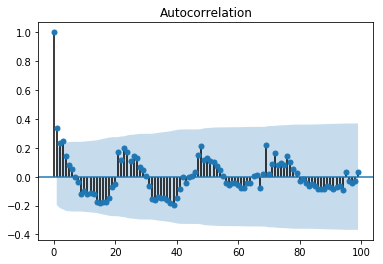

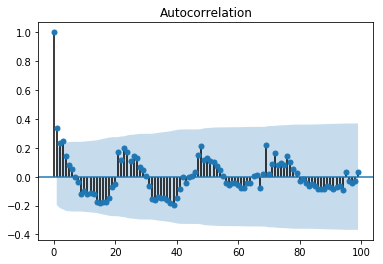

In [78]:
plot_acf(MEXTLAMSS1_df['value'][:100])

##### This is also close to being stationary

In [79]:
MEXTLAMSS1_df_dff = MEXTLAMSS1_df['value'].diff(periods=1)

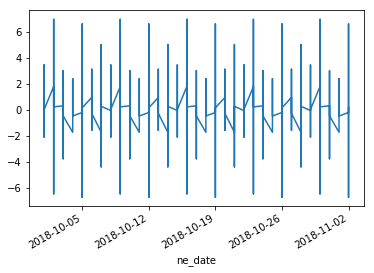

In [80]:
MEXTLAMSS1_df_dff.plot(y='value')

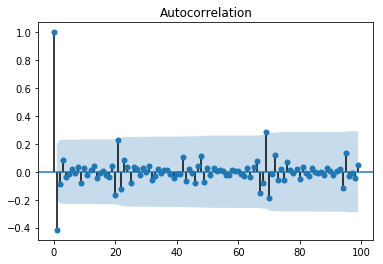

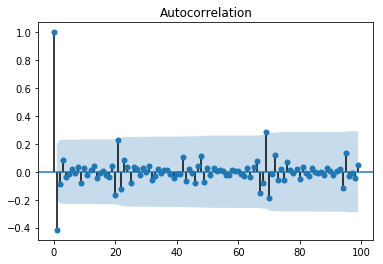

In [81]:
plot_acf(MEXTLAMSS1_df_dff[1:][:100])

##### perfectly stationary

##### Since the above statistical models did not work very well wwe will start with machine learning models to model our data and hoping to get better results

### time based splitting of data

In [142]:
MEXGDLMSS1_df_dropped = MEXGDLMSS1_df.drop(columns=['kpi', 'unit', 'kpi_id', 'ne_date', 'ne_id', 'datetime'])

In [143]:
MEXGDLMSS1_x_train = MEXGDLMSS1_df_dropped[0:int(np.round(0.8*MEXGDLMSS1_df.shape[0]))]
MEXGDLMSS1_x_test = MEXGDLMSS1_df_dropped[int(np.round(0.8*MEXGDLMSS1_df.shape[0])):]

In [152]:
MEXGDLMSS1_x_train.head()

,ne_hour,value
datetime,,
2018-10-01 00:00:00,00:00:00,90.17
2018-10-01 00:01:00,00:01:00,90.24
2018-10-01 00:02:00,00:02:00,91.13
2018-10-01 00:03:00,00:03:00,91.96
2018-10-01 00:04:00,00:04:00,92.18


### Machine learning models

##### Since we are applying machine learning models, We need labels for each of our data as we are doing supervised learning on the data i.e we are doing regression

In [190]:
MEXGDLMSS1_x_train['label'] = MEXGDLMSS1_x_train['value'].shift(periods=1)
MEXGDLMSS1_x_test['label'] = MEXGDLMSS1_x_test['value'].shift(periods=1)

C:\Users\karth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\karth\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
MEXGDLMSS1_x_train.drop(columns=['label'])
MEXGDLMSS1_x_test.drop(columns=['label'])

In [193]:
print(len(MEXGDLMSS1_x_train['label'].values), ' is the no of labels in our dataset while ' +  str(len((MEXGDLMSS1_x_train['value'].values))) + ' is the number of values')
print(len(MEXGDLMSS1_x_test['label'].values), ' is the no of labels in our dataset while ' +  str(len((MEXGDLMSS1_x_test['value'].values))) + ' is the number of values')

634  is the no of labels in our dataset while 634 is the number of values
158  is the no of labels in our dataset while 158 is the number of values


##### We will fill the NAN values which occured while shifting the data for creating labels

In [194]:
MEXGDLMSS1_x_train.fillna(0, inplace=True)
MEXGDLMSS1_x_test.fillna(0, inplace=True)

C:\Users\karth\Anaconda3\lib\site-packages\pandas\core\frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [195]:
MEXGDLMSS1_x_train.head()

,ne_hour,value,label
datetime,,,
2018-10-01 00:00:00,00:00:00,90.17,0.00
2018-10-01 00:01:00,00:01:00,90.24,90.17
2018-10-01 00:02:00,00:02:00,91.13,90.24
2018-10-01 00:03:00,00:03:00,91.96,91.13
2018-10-01 00:04:00,00:04:00,92.18,91.96


### Another Simple test for stationarity just to be sure

In [200]:
np.mean(MEXGDLMSS1_df['value'].values)

91.16626262626262

In [201]:
np.mean(MEXGDLMSS1_x_train['value'].values)

91.16900630914826

In [202]:
np.mean(MEXGDLMSS1_x_test['value'].values)

91.15525316455697

In [203]:
from statistics import variance

In [204]:
variance(MEXGDLMSS1_x_train['value'].values)

3.8055186002760877

In [205]:
variance(MEXGDLMSS1_x_test['value'].values)

3.2076454769007507

##### Looking from the above results, We get that mean, variance doesnot have a huge difference and hence we conclude the data is already stationary

### Our dataset is already stationary, We are good to go

In [246]:
x_train_array = np.array(MEXGDLMSS1_x_train.drop(columns=['label', 'ne_hour']))
x_test_array = np.array(MEXGDLMSS1_x_test.drop(columns=['label', 'ne_hour']))

In [237]:
y_train_array = np.array(MEXGDLMSS1_x_train['label'].values)
y_test_array = np.array(MEXGDLMSS1_x_test['label'].values)

In [232]:
x_train = x_train_array.reshape(x_train_array.shape[0], 1, x_train_array.shape[1])
x_test = x_test_array.reshape(x_test_array.shape[0], 1, x_test_array.shape[1])

In [278]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

### Random forest regressor

In [269]:
import warnings
warnings.filterwarnings('ignore')

In [273]:
params = [{'n_estimators':[int(x) for x in np.linspace(start=1, stop=50, num=30)]},{'max_depth':[1,2,3,4]},{'max_features':['auto','sqrt']}]

In [274]:
clf = RandomForestRegressor()
model = GridSearchCV(clf, param_grid=params, refit=True)

In [275]:
model.fit(x_train_array, y_train_array)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [1, 2, 4, 6, 7, 9, 11, 12, 14, 16, 17, 19, 21, 22, 24, 26, 28, 29, 31, 33, 34, 36, 38, 39, 41, 43, 44, 46, 48, 50]}, {'max_depth': [1, 2, 3, 4]}, {'max_features': ['auto', 'sqrt']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### best params

In [279]:
model.best_params_

{'n_estimators': 2}

In [280]:
predict = model.predict(x_test_array)

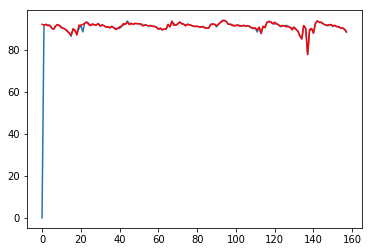

In [281]:
plt.plot(y_test_array)
plt.plot(predict, color='red')

In [282]:
mean_squared_error(y_true = y_test_array, y_pred = predict)

53.971751677538684

##### Our random forest regressor does a pretty good job. This technique is called bagging (boostrap-aggregation). This is just a random try. Lets try some good regression models which should perform equal if not better than random forest as our data is pretty simple

### XGBoost

#### Lets create features for our data

In [293]:
def date_converter(date):
    return pd.datetime.strptime(date, '%Y-%m-%d')

In [294]:
new_df = pd.read_csv('new_df.csv', parse_dates=[3], date_parser=date_converter, index_col=[3])

In [296]:
##credits: www.kaggle.coms

def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [400]:
new_df.head()

,kpi,unit,kpi_id,ne_hour,ne_id,value,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
ne_date,,,,,,,,,,,,,,,
2018-10-01,Call Setup Success Rate,%,3561851598725308,0,MEXTLAMSS1,90.32,2018-10-01,0,0,4,10,2018,274,1,40
2018-10-01,Call Setup Success Rate,%,3561851598725308,0,MEXTIJMSS1,94.90,2018-10-01,0,0,4,10,2018,274,1,40
2018-10-01,Call Setup Success Rate,%,3561851598725308,0,MEXMTYMSS1,90.34,2018-10-01,0,0,4,10,2018,274,1,40
2018-10-01,Call Setup Success Rate,%,3561851598725308,0,MEXMTYMSS2,92.85,2018-10-01,0,0,4,10,2018,274,1,40
2018-10-01,Call Setup Success Rate,%,3561851598725308,0,MEXGDLMSS1,90.17,2018-10-01,0,0,4,10,2018,274,1,40


In [313]:
xgboost_data = create_features(new_df, label='value')[0]
xgboost_labels = create_features(new_df, label='value')[1]

In [314]:
xgboost_data['hour'] = new_df['ne_hour'].values
xgboost_data['ne_id'] = new_df['ne_id']

In [317]:
xgboost_labels = pd.DataFrame(xgboost_labels, columns=['value'])

In [318]:
xgboost_labels.head()

,value
ne_date,
2018-10-01,90.32
2018-10-01,94.90
2018-10-01,90.34
2018-10-01,92.85
2018-10-01,90.17


In [321]:
xgboost_data.to_csv('xgboost_data.csv', index=False)
xgboost_labels.to_csv('xgboost_labels.csv', index=False)

In [338]:
xgboost_data['labels'] = xgboost_labels

### WE will split data based on the network device. There are 5 devices and hence we will have 5 datasets

In [341]:
xgboost_MEXGDLMSS1_df = xgboost_data[xgboost_data['ne_id'] == 'MEXGDLMSS1']

In [342]:
xgboost_MEXGDLMSS1_df.head()

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,ne_id,labels
ne_date,,,,,,,,,,
2018-10-01,0,0,4,10,2018,274,1,40,MEXGDLMSS1,90.17
2018-10-01,1,0,4,10,2018,274,1,40,MEXGDLMSS1,90.24
2018-10-01,2,0,4,10,2018,274,1,40,MEXGDLMSS1,91.13
2018-10-01,3,0,4,10,2018,274,1,40,MEXGDLMSS1,91.96
2018-10-01,4,0,4,10,2018,274,1,40,MEXGDLMSS1,92.18


In [343]:
xgboost_MEXGDLMSS1_df.shape

(792, 10)

In [344]:
xgboost_MEXMTYMSS1_df = xgboost_data[xgboost_data['ne_id'] == 'MEXMTYMSS1']
print(xgboost_MEXMTYMSS1_df.shape)
xgboost_MEXMTYMSS1_df.head()

(792, 10)


,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,ne_id,labels
ne_date,,,,,,,,,,
2018-10-01,0,0,4,10,2018,274,1,40,MEXMTYMSS1,90.34
2018-10-01,1,0,4,10,2018,274,1,40,MEXMTYMSS1,91.57
2018-10-01,2,0,4,10,2018,274,1,40,MEXMTYMSS1,91.15
2018-10-01,3,0,4,10,2018,274,1,40,MEXMTYMSS1,91.67
2018-10-01,4,0,4,10,2018,274,1,40,MEXMTYMSS1,92.49


In [345]:
xgboost_MEXMTYMSS2_df = xgboost_data[xgboost_data['ne_id'] == 'MEXMTYMSS2']
print(xgboost_MEXMTYMSS2_df.shape)
xgboost_MEXMTYMSS2_df.head()

(792, 10)


,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,ne_id,labels
ne_date,,,,,,,,,,
2018-10-01,0,0,4,10,2018,274,1,40,MEXMTYMSS2,92.85
2018-10-01,1,0,4,10,2018,274,1,40,MEXMTYMSS2,91.22
2018-10-01,2,0,4,10,2018,274,1,40,MEXMTYMSS2,92.71
2018-10-01,3,0,4,10,2018,274,1,40,MEXMTYMSS2,94.76
2018-10-01,4,0,4,10,2018,274,1,40,MEXMTYMSS2,97.40


In [346]:
xgboost_MEXTIJMSS1_df = xgboost_data[xgboost_data['ne_id'] == 'MEXTIJMSS1']
print(xgboost_MEXTIJMSS1_df.shape)
xgboost_MEXTIJMSS1_df.head()

(792, 10)


,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,ne_id,labels
ne_date,,,,,,,,,,
2018-10-01,0,0,4,10,2018,274,1,40,MEXTIJMSS1,94.90
2018-10-01,1,0,4,10,2018,274,1,40,MEXTIJMSS1,94.73
2018-10-01,2,0,4,10,2018,274,1,40,MEXTIJMSS1,95.09
2018-10-01,3,0,4,10,2018,274,1,40,MEXTIJMSS1,95.44
2018-10-01,4,0,4,10,2018,274,1,40,MEXTIJMSS1,94.66


In [347]:
xgboost_MEXTLAMSS1_df = xgboost_data[xgboost_data['ne_id'] == 'MEXTLAMSS1']
print(xgboost_MEXTLAMSS1_df.shape)
xgboost_MEXTLAMSS1_df.head()

(792, 10)


,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,ne_id,labels
ne_date,,,,,,,,,,
2018-10-01,0,0,4,10,2018,274,1,40,MEXTLAMSS1,90.32
2018-10-01,1,0,4,10,2018,274,1,40,MEXTLAMSS1,92.33
2018-10-01,2,0,4,10,2018,274,1,40,MEXTLAMSS1,92.45
2018-10-01,3,0,4,10,2018,274,1,40,MEXTLAMSS1,92.33
2018-10-01,4,0,4,10,2018,274,1,40,MEXTLAMSS1,90.24


In [348]:
MEXGDLMSS1_df.head()

,kpi,unit,kpi_id,ne_date,ne_hour,ne_id,value,datetime
datetime,,,,,,,,
2018-10-01 00:00:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:00:00,MEXGDLMSS1,90.17,2018-10-01 00:00:00
2018-10-01 00:01:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:01:00,MEXGDLMSS1,90.24,2018-10-01 00:01:00
2018-10-01 00:02:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:02:00,MEXGDLMSS1,91.13,2018-10-01 00:02:00
2018-10-01 00:03:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:03:00,MEXGDLMSS1,91.96,2018-10-01 00:03:00
2018-10-01 00:04:00,Call Setup Success Rate,%,3561851598725308,2018-10-01,00:04:00,MEXGDLMSS1,92.18,2018-10-01 00:04:00


### Lets export all the induvidual datasets

In [349]:
xgboost_MEXGDLMSS1_df.to_csv('xgboost_MEXGDLMSS1_df.csv', index=False)
xgboost_MEXMTYMSS1_df.to_csv('xgboost_MEXMTYMSS1_df.csv', index=False)
xgboost_MEXMTYMSS2_df.to_csv('xgboost_MEXMTYMSS2_df.csv', index=False)
xgboost_MEXTIJMSS1_df.to_csv('xgboost_MEXTIJMSS1_df.csv', index=False)
xgboost_MEXTLAMSS1_df.to_csv('xgboost_MEXTLAMSS1_df.csv', index=False)

### Lets start modelling


##### For each network device's data we are splitting data as train and test. Since the data is already present in ascending date wise, We will take first 80% data as train and last 20% data as split

In [701]:
xgboost_MEXGDLMSS1_train = xgboost_MEXGDLMSS1_df[0:int(np.round(0.8*xgboost_MEXGDLMSS1_df.shape[0]))]
xgboost_MEXGDLMSS1_test = xgboost_MEXGDLMSS1_df[int(np.round(0.8*xgboost_MEXGDLMSS1_df.shape[0])):]

In [702]:
train_labels = xgboost_MEXGDLMSS1_train['labels']
test_labels = xgboost_MEXGDLMSS1_test['labels']

In [703]:
print(xgboost_MEXGDLMSS1_train.shape)
print(xgboost_MEXGDLMSS1_test.shape)

(634, 10)
(158, 10)


In [704]:
xgboost_MEXGDLMSS1_train = xgboost_MEXGDLMSS1_train.drop(columns=['ne_id', 'labels'])
xgboost_MEXGDLMSS1_test = xgboost_MEXGDLMSS1_test.drop(columns=['ne_id', 'labels'])

### checking shapes

In [705]:
print(xgboost_MEXGDLMSS1_test.shape)
print(xgboost_MEXGDLMSS1_train.shape)
print(train_labels.shape)
print(test_labels.shape)

(158, 8)
(634, 8)
(634,)
(158,)


In [706]:
reg = xgb.XGBRegressor(n_estimators=50)
reg.fit(xgboost_MEXGDLMSS1_train, train_labels,
        eval_set=[(xgboost_MEXGDLMSS1_train, train_labels), (xgboost_MEXGDLMSS1_test, test_labels)],
        early_stopping_rounds=50, )

[0]	validation_0-rmse:81.6397	validation_1-rmse:81.6222
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:73.4935	validation_1-rmse:73.4755
[2]	validation_0-rmse:66.1611	validation_1-rmse:66.1428
[3]	validation_0-rmse:59.5615	validation_1-rmse:59.5426
[4]	validation_0-rmse:53.6214	validation_1-rmse:53.602
[5]	validation_0-rmse:48.2752	validation_1-rmse:48.2551
[6]	validation_0-rmse:43.4636	validation_1-rmse:43.4428
[7]	validation_0-rmse:39.1333	validation_1-rmse:39.1117
[8]	validation_0-rmse:35.2363	validation_1-rmse:35.2139
[9]	validation_0-rmse:31.7296	validation_1-rmse:31.7062
[10]	validation_0-rmse:28.5743	validation_1-rmse:28.5498
[11]	validation_0-rmse:25.7353	validation_1-rmse:25.7097
[12]	validation_0-rmse:23.1814	validation_1-rmse:23.1545
[13]	validation_0-rmse:20.8842	validation_1-rmse:20.8558
[14]	validation_0-rmse:18.818	validation_1-rmse:18.785

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

### Feature importance plots

##### These plots are very helpful as they convey which features are very important for prediction. From the below plot we understand that hour and dayofweek features have high FScore which means that hour and dayofweek are the most important value when the algorithm forecasts the predictor value

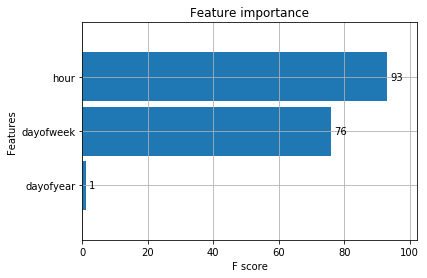

In [376]:
plot_importance(reg, height=0.9)

### prediction

In [707]:
pred = reg.predict(xgboost_MEXGDLMSS1_test)

### plots

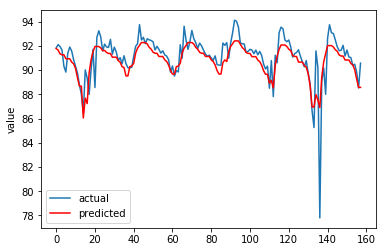

In [708]:
plt.plot(test_labels.values, label='actual')
plt.plot(pred, color='red', label='predicted')
plt.ylabel('value')
plt.legend()

### metrics

In [384]:
mean_squared_error(test_labels.values, pred)

1.3950209035836778

##### Our mean squared error is 1.39

In [385]:
mean_absolute_error(test_labels.values, pred)

0.7408648585066012

##### Our mean absolute error is 0.74

### Forecasting for unseen unknown data

In [387]:
xgboost_MEXGDLMSS1_test.tail()

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
ne_date,,,,,,,,
2018-11-02,19,4,4,11,2018,306,2,44
2018-11-02,20,4,4,11,2018,306,2,44
2018-11-02,21,4,4,11,2018,306,2,44
2018-11-02,22,4,4,11,2018,306,2,44
2018-11-02,23,4,4,11,2018,306,2,44


##### Here the last day in our test data is 02/11/2018 and so we will predict from 03/11/2018

#### Creates dates

In [424]:
import datetime
dt = datetime.datetime(2018, 11, 3)
end = datetime.datetime(2018, 11, 6, 23, 59, 59)
step = datetime.timedelta(seconds=3600)

result = []

while dt < end:
    result.append(dt.strftime('%Y-%m-%d'))
    dt += step

In [442]:
forecast_df = pd.DataFrame(data=[date_converter(i) for i in result], columns=['ne_date'])

##### We have generated the dates and now we will set it as index

In [448]:
forecast_df = forecast_df.set_index(['ne_date'])

In [449]:
forecast_df.head()

""
ne_date
2018-11-03
2018-11-03
2018-11-03
2018-11-03
2018-11-03


In [401]:
def date_converter(date):
    return pd.datetime.strptime(date, '%Y-%m-%d')

In [466]:
def new_create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [467]:
forecast_df = new_create_features(forecast_df, label=None)

In [469]:
forecast_df['hour'] = (xgboost_MEXGDLMSS1_df['hour'].values[:96])

In [659]:
forecast_df.head()

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
ne_date,,,,,,,,
2018-11-03,0,5,4,11,2018,307,3,44
2018-11-03,1,5,4,11,2018,307,3,44
2018-11-03,2,5,4,11,2018,307,3,44
2018-11-03,3,5,4,11,2018,307,3,44
2018-11-03,4,5,4,11,2018,307,3,44


### So lets now predict for the next 3 days 3/11/2018 to 6/11/2018

In [472]:
pred = reg.predict(forecast_df)

In [488]:
test_values = list(test_labels.values)
forecasted_values = list(pred)

print(len(test_values))
print(len(forecasted_values))

158
96


In [489]:
test_and_forecasted = test_values + forecasted_values

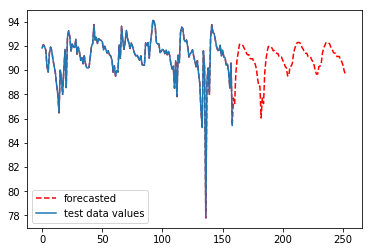

In [508]:
fig, ax = plt.subplots()
ax.plot(test_and_forecasted, 'r--',label='forecasted')
ax.plot(test_and_forecasted[0:159], label='test data values', )
plt.legend()

### Our model is performing good without any hyperparameter tuning, optimization or any tuning. Hence if we tune the model well, this should perform very well

### Now we will do the same for all the other network devices

### Now for the next network device - MEXMTYMSS1

In [509]:
xgboost_MEXMTYMSS1_df.head()

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,ne_id,labels
ne_date,,,,,,,,,,
2018-10-01,0,0,4,10,2018,274,1,40,MEXMTYMSS1,90.34
2018-10-01,1,0,4,10,2018,274,1,40,MEXMTYMSS1,91.57
2018-10-01,2,0,4,10,2018,274,1,40,MEXMTYMSS1,91.15
2018-10-01,3,0,4,10,2018,274,1,40,MEXMTYMSS1,91.67
2018-10-01,4,0,4,10,2018,274,1,40,MEXMTYMSS1,92.49


In [690]:
xgboost_MEXMTYMSS1_train = xgboost_MEXMTYMSS1_df[0:int(np.round(0.8*xgboost_MEXMTYMSS1_df.shape[0]))]
xgboost_MEXMTYMSS1_test = xgboost_MEXMTYMSS1_df[int(np.round(0.8*xgboost_MEXMTYMSS1_df.shape[0])):]

In [691]:
train_labels = xgboost_MEXMTYMSS1_train['labels']
test_labels = xgboost_MEXMTYMSS1_test['labels']

In [696]:
xgboost_MEXMTYMSS1_train = xgboost_MEXMTYMSS1_train.drop(columns=['ne_id', 'labels'])
xgboost_MEXMTYMSS1_test = xgboost_MEXMTYMSS1_test.drop(columns=['ne_id', 'labels'])

In [697]:
xgboost_MEXMTYMSS1_test.head()

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
ne_date,,,,,,,,
2018-10-27,10,5,4,10,2018,300,27,43
2018-10-27,11,5,4,10,2018,300,27,43
2018-10-27,12,5,4,10,2018,300,27,43
2018-10-27,13,5,4,10,2018,300,27,43
2018-10-27,14,5,4,10,2018,300,27,43


### checking shapes

In [519]:
print(xgboost_MEXMTYMSS1_test.shape)
print(xgboost_MEXMTYMSS1_train.shape)
print(train_labels.shape)
print(test_labels.shape)

(158, 8)
(634, 8)
(634,)
(158,)


In [694]:
xgboost_MEXMTYMSS1_train.head()

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,ne_id
ne_date,,,,,,,,,
2018-10-01,0,0,4,10,2018,274,1,40,MEXMTYMSS1
2018-10-01,1,0,4,10,2018,274,1,40,MEXMTYMSS1
2018-10-01,2,0,4,10,2018,274,1,40,MEXMTYMSS1
2018-10-01,3,0,4,10,2018,274,1,40,MEXMTYMSS1
2018-10-01,4,0,4,10,2018,274,1,40,MEXMTYMSS1


In [698]:
reg = xgb.XGBRegressor(n_estimators=50)
reg.fit(xgboost_MEXMTYMSS1_train, train_labels,
        eval_set=[(xgboost_MEXMTYMSS1_train, train_labels), (xgboost_MEXMTYMSS1_test, test_labels)],
        early_stopping_rounds=50, )

[0]	validation_0-rmse:80.2947	validation_1-rmse:81.018
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:72.3277	validation_1-rmse:73.0392
[2]	validation_0-rmse:65.1617	validation_1-rmse:65.86
[3]	validation_0-rmse:58.698	validation_1-rmse:59.338
[4]	validation_0-rmse:52.8792	validation_1-rmse:53.4662
[5]	validation_0-rmse:47.6412	validation_1-rmse:48.18
[6]	validation_0-rmse:42.9393	validation_1-rmse:43.4659
[7]	validation_0-rmse:38.6949	validation_1-rmse:39.1736
[8]	validation_0-rmse:34.8725	validation_1-rmse:35.327
[9]	validation_0-rmse:31.4314	validation_1-rmse:31.8659
[10]	validation_0-rmse:28.3362	validation_1-rmse:28.7318
[11]	validation_0-rmse:25.5518	validation_1-rmse:25.9265
[12]	validation_0-rmse:23.0441	validation_1-rmse:23.404
[13]	validation_0-rmse:20.789	validation_1-rmse:21.1196
[14]	validation_0-rmse:18.7628	validation_1-rmse:19.0637
[15]	v

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

##### These plots are very helpful as they convey which features are very important for prediction. From the below plot we understand that hour and dayofweek features have high FScore which means that hour and dayofweek are the most important value when the algorithm forecasts the predictor value

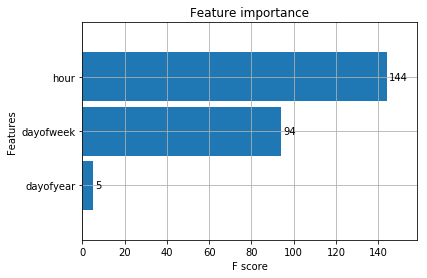

In [521]:
plot_importance(reg, height=0.9)

### prediction

In [699]:
pred = reg.predict(xgboost_MEXMTYMSS1_test)

### plots on test data

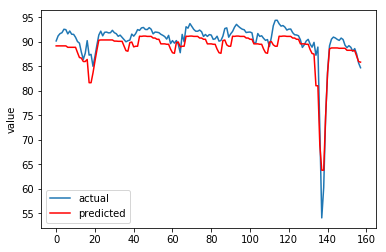

In [700]:
plt.plot(test_labels.values, label='actual')
plt.plot(pred, color='red', label='predicted')
plt.ylabel('value')
plt.legend()

### metrics

In [527]:
mean_squared_error(test_labels.values, pred)

5.078298504704865

##### Our mse is 5.07

In [528]:
mean_absolute_error(test_labels.values, pred)

1.8163311960727353

##### our mae is 1.81

### So lets now predict for the next 3 days 3/11/2018 to 6/11/2018

In [531]:
pred = reg.predict(forecast_df)

In [532]:
test_values = list(test_labels.values)
forecasted_values = list(pred)

print(len(test_values))
print(len(forecasted_values))

158
96


In [533]:
test_and_forecasted = test_values + forecasted_values

In [534]:
len(test_and_forecasted)

254

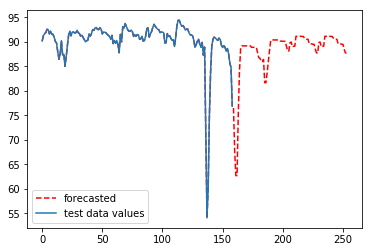

In [535]:
fig, ax = plt.subplots()
ax.plot(test_and_forecasted, 'r--',label='forecasted')
ax.plot(test_and_forecasted[0:159], label='test data values', )
plt.legend()

### Now for the next network device - MEXMTYMSS2

### modelling


In [683]:
xgboost_MEXMTYMSS2_train = xgboost_MEXMTYMSS2_df[0:int(np.round(0.8*xgboost_MEXMTYMSS2_df.shape[0]))]
xgboost_MEXMTYMSS2_test = xgboost_MEXMTYMSS2_df[int(np.round(0.8*xgboost_MEXMTYMSS2_df.shape[0])):]

In [684]:
train_labels = xgboost_MEXMTYMSS2_train['labels']
test_labels = xgboost_MEXMTYMSS2_test['labels']

In [685]:
print(xgboost_MEXMTYMSS2_train.shape)
print(xgboost_MEXMTYMSS2_test.shape)

(634, 10)
(158, 10)


In [686]:
xgboost_MEXMTYMSS2_train = xgboost_MEXMTYMSS2_train.drop(columns=['labels', 'ne_id'])
xgboost_MEXMTYMSS2_test = xgboost_MEXMTYMSS2_test.drop(columns=['labels', 'ne_id'])

### checking shapes

In [543]:
print(xgboost_MEXMTYMSS2_test.shape)
print(xgboost_MEXMTYMSS2_train.shape)
print(train_labels.shape)
print(test_labels.shape)

(158, 8)
(634, 8)
(634,)
(158,)


In [687]:
reg = xgb.XGBRegressor(n_estimators=50)
reg.fit(xgboost_MEXMTYMSS2_train, train_labels,
        eval_set=[(xgboost_MEXMTYMSS2_train, train_labels), (xgboost_MEXMTYMSS2_test, test_labels)],
        early_stopping_rounds=50, )

[0]	validation_0-rmse:82.9218	validation_1-rmse:82.8039
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:74.6483	validation_1-rmse:74.5305
[2]	validation_0-rmse:67.2014	validation_1-rmse:67.0837
[3]	validation_0-rmse:60.4987	validation_1-rmse:60.3812
[4]	validation_0-rmse:54.466	validation_1-rmse:54.3487
[5]	validation_0-rmse:49.0364	validation_1-rmse:48.9193
[6]	validation_0-rmse:44.1499	validation_1-rmse:44.033
[7]	validation_0-rmse:39.7523	validation_1-rmse:39.6357
[8]	validation_0-rmse:35.795	validation_1-rmse:35.6786
[9]	validation_0-rmse:32.234	validation_1-rmse:32.118
[10]	validation_0-rmse:29.0287	validation_1-rmse:28.919
[11]	validation_0-rmse:26.1439	validation_1-rmse:26.0435
[12]	validation_0-rmse:23.5473	validation_1-rmse:23.4523
[13]	validation_0-rmse:21.2105	validation_1-rmse:21.125
[14]	validation_0-rmse:19.1076	validation_1-rmse:19.0267
[15

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

##### These plots are very helpful as they convey which features are very important for prediction. From the below plot we understand that hour and dayofweek features have high FScore which means that hour and dayofweek are the most important value when the algorithm forecasts the predictor value

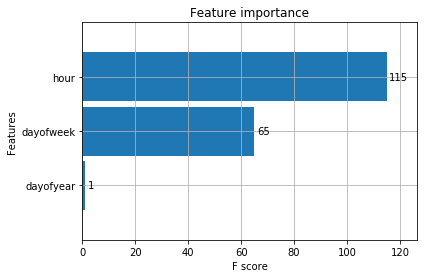

In [545]:
plot_importance(reg, height=0.9)

### prediction

In [688]:
pred = reg.predict(xgboost_MEXMTYMSS2_test)

### plots on test data

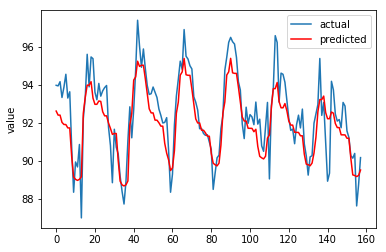

In [689]:
plt.plot(test_labels.values, label='actual')
plt.plot(pred, color='red', label='predicted')
plt.ylabel('value')
plt.legend()

### metrics

In [550]:
mean_squared_error(test_labels.values, pred)

1.3493126710692576

##### mse is 1.34

In [551]:
mean_absolute_error(test_labels.values, pred)

0.9400626267058939

#####  mae is 0.94

### So lets now predict for the next 3 days 3/11/2018 to 6/11/2018

In [553]:
pred = reg.predict(forecast_df)

In [554]:
test_values = list(test_labels.values)
forecasted_values = list(pred)

print(len(test_values))
print(len(forecasted_values))

158
96


In [555]:
test_and_forecasted = test_values + forecasted_values

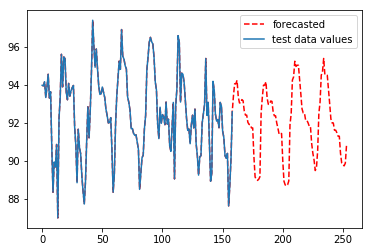

In [557]:
fig, ax = plt.subplots()
ax.plot(test_and_forecasted, 'r--',label='forecasted')
ax.plot(test_and_forecasted[0:159], label='test data values', )
plt.legend()

### Now for the next network device - MEXTIJMSS1

### modelling


In [676]:
xgboost_MEXTIJMSS1_train = xgboost_MEXTIJMSS1_df[0:int(np.round(0.8*xgboost_MEXTIJMSS1_df.shape[0]))]
xgboost_MEXTIJMSS1_test = xgboost_MEXTIJMSS1_df[int(np.round(0.8*xgboost_MEXTIJMSS1_df.shape[0])):]

In [677]:
train_labels = xgboost_MEXTIJMSS1_train['labels']
test_labels = xgboost_MEXTIJMSS1_test['labels']

In [678]:
xgboost_MEXTIJMSS1_train = xgboost_MEXTIJMSS1_train.drop(columns=['ne_id','labels'])
xgboost_MEXTIJMSS1_test = xgboost_MEXTIJMSS1_test.drop(columns=['ne_id','labels'])

### checking shapes

In [679]:
print(xgboost_MEXTIJMSS1_test.shape)
print(xgboost_MEXTIJMSS1_train.shape)
print(train_labels.shape)
print(test_labels.shape)

(158, 8)
(634, 8)
(634,)
(158,)


In [680]:
reg = xgb.XGBRegressor(n_estimators=50)
reg.fit(xgboost_MEXTIJMSS1_train, train_labels,
        eval_set=[(xgboost_MEXTIJMSS1_train, train_labels), (xgboost_MEXTIJMSS1_test, test_labels)],
        early_stopping_rounds=50, )

[0]	validation_0-rmse:82.9086	validation_1-rmse:82.7948
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:74.636	validation_1-rmse:74.5223
[2]	validation_0-rmse:67.19	validation_1-rmse:67.0763
[3]	validation_0-rmse:60.488	validation_1-rmse:60.3744
[4]	validation_0-rmse:54.4559	validation_1-rmse:54.3424
[5]	validation_0-rmse:49.0268	validation_1-rmse:48.9134
[6]	validation_0-rmse:44.1407	validation_1-rmse:44.0274
[7]	validation_0-rmse:39.7434	validation_1-rmse:39.6302
[8]	validation_0-rmse:35.7862	validation_1-rmse:35.6732
[9]	validation_0-rmse:32.2254	validation_1-rmse:32.1125
[10]	validation_0-rmse:29.021	validation_1-rmse:28.9193
[11]	validation_0-rmse:26.1368	validation_1-rmse:26.0454
[12]	validation_0-rmse:23.541	validation_1-rmse:23.4568
[13]	validation_0-rmse:21.2049	validation_1-rmse:21.1301
[14]	validation_0-rmse:19.1026	validation_1-rmse:19.0351
[1

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

##### These plots are very helpful as they convey which features are very important for prediction. From the below plot we understand that hour and dayofweek features have high FScore which means that hour and dayofweek are the most important value when the algorithm forecasts the predictor value

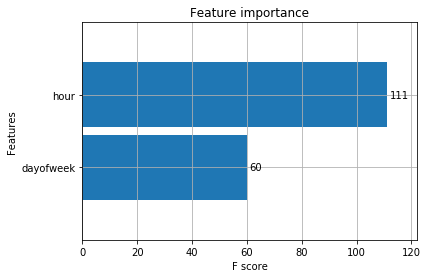

In [568]:
plot_importance(reg, height=0.9)

### prediction

In [681]:
pred = reg.predict(xgboost_MEXTIJMSS1_test)

### plots on test data

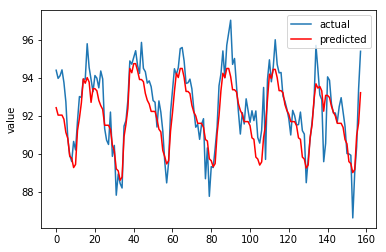

In [682]:
plt.plot(test_labels.values, label='actual')
plt.plot(pred, color='red', label='predicted')
plt.ylabel('value')
plt.legend()

### metrics

In [573]:
mean_squared_error(test_labels.values, pred)

1.192999459932552

##### mse is 1.19

In [574]:
mean_absolute_error(test_labels.values, pred)

0.8584582152547714

##### mae is 0.85

### So lets now predict for the next 3 days 3/11/2018 to 6/11/2018

In [576]:
pred = reg.predict(forecast_df)

In [577]:
test_values = list(test_labels.values)
forecasted_values = list(pred)

print(len(test_values))
print(len(forecasted_values))

158
96


In [578]:
test_and_forecasted = test_values + forecasted_values

In [579]:
len(test_and_forecasted)

254

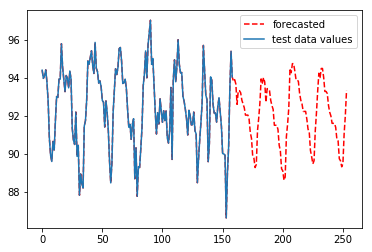

In [580]:
fig, ax = plt.subplots()
ax.plot(test_and_forecasted, 'r--',label='forecasted')
ax.plot(test_and_forecasted[0:159], label='test data values', )
plt.legend()

### Now for the next network device

### Now for the next network device - MEXTLAMSS1

### modelling


In [668]:
xgboost_MEXTLAMSS1_train = xgboost_MEXTLAMSS1_df[0:int(np.round(0.8*xgboost_MEXTLAMSS1_df.shape[0]))]
xgboost_MEXTLAMSS1_test = xgboost_MEXTLAMSS1_df[int(np.round(0.8*xgboost_MEXTLAMSS1_df.shape[0])):]

In [669]:
train_labels = xgboost_MEXTLAMSS1_train['labels']
test_labels = xgboost_MEXTLAMSS1_test['labels']

In [670]:
xgboost_MEXTLAMSS1_train = xgboost_MEXTLAMSS1_train.drop(columns=['ne_id','labels'])
xgboost_MEXTLAMSS1_test = xgboost_MEXTLAMSS1_test.drop(columns=['ne_id','labels'])

### checking shapes

In [671]:
print(xgboost_MEXTLAMSS1_test.shape)
print(xgboost_MEXTLAMSS1_train.shape)
print(train_labels.shape)
print(test_labels.shape)

(158, 8)
(634, 8)
(634,)
(158,)


In [672]:
reg = xgb.XGBRegressor(n_estimators=50)
reg.fit(xgboost_MEXTLAMSS1_train, train_labels,
        eval_set=[(xgboost_MEXTLAMSS1_train, train_labels), (xgboost_MEXTLAMSS1_test, test_labels)],
        early_stopping_rounds=50, )

[0]	validation_0-rmse:81.5551	validation_1-rmse:81.4765
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:73.4163	validation_1-rmse:73.3378
[2]	validation_0-rmse:66.0904	validation_1-rmse:66.0121
[3]	validation_0-rmse:59.4964	validation_1-rmse:59.4184
[4]	validation_0-rmse:53.5613	validation_1-rmse:53.4835
[5]	validation_0-rmse:48.2194	validation_1-rmse:48.1418
[6]	validation_0-rmse:43.4115	validation_1-rmse:43.3341
[7]	validation_0-rmse:39.0843	validation_1-rmse:39.0072
[8]	validation_0-rmse:35.1899	validation_1-rmse:35.1132
[9]	validation_0-rmse:31.6852	validation_1-rmse:31.6089
[10]	validation_0-rmse:28.5314	validation_1-rmse:28.4555
[11]	validation_0-rmse:25.6936	validation_1-rmse:25.6182
[12]	validation_0-rmse:23.1403	validation_1-rmse:23.0654
[13]	validation_0-rmse:20.8433	validation_1-rmse:20.769
[14]	validation_0-rmse:18.777	validation_1-rmse:18.703

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

##### These plots are very helpful as they convey which features are very important for prediction. From the below plot we understand that hour and dayofweek features have high FScore which means that hour and dayofweek are the most important value when the algorithm forecasts the predictor value

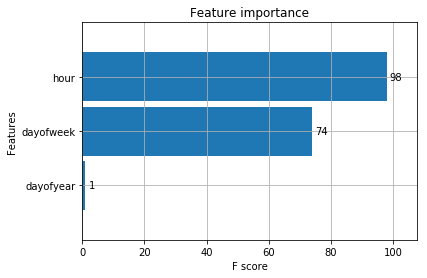

In [673]:
plot_importance(reg, height=0.9)

### prediction

In [674]:
pred = reg.predict(xgboost_MEXTLAMSS1_test)

### plots on test data

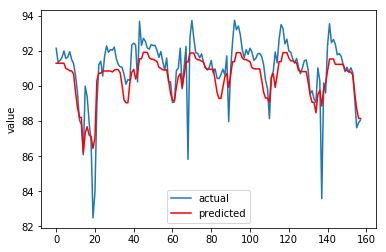

In [675]:
plt.plot(test_labels.values, label='actual')
plt.plot(pred, color='red', label='predicted')
plt.ylabel('value')
plt.legend()

### metrics

In [595]:
mean_squared_error(test_labels.values, pred)

1.344164337904645

##### mse is 1.34

In [596]:
mean_absolute_error(test_labels.values, pred)

0.823427440788172

##### mae is 0.82

### So lets now predict for the next 3 days 3/11/2018 to 6/11/2018

In [597]:
pred = reg.predict(forecast_df)

In [598]:
test_values = list(test_labels.values)
forecasted_values = list(pred)

print(len(test_values))
print(len(forecasted_values))

158
96


In [599]:
test_and_forecasted = test_values + forecasted_values

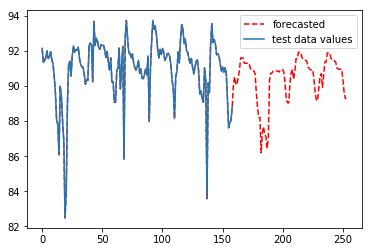

In [601]:
fig, ax = plt.subplots()
ax.plot(test_and_forecasted, 'r--',label='forecasted')
ax.plot(test_and_forecasted[0:159], label='test data values', )
plt.legend()

### Now for the next network device - MEXTLAMSS1

### modelling


In [660]:
xgboost_MEXTLAMSS1_train = xgboost_MEXTLAMSS1_df[0:int(np.round(0.8*xgboost_MEXTLAMSS1_df.shape[0]))]
xgboost_MEXTLAMSS1_test = xgboost_MEXTLAMSS1_df[int(np.round(0.8*xgboost_MEXTLAMSS1_df.shape[0])):]

In [661]:
train_labels = xgboost_MEXTLAMSS1_train['labels']
test_labels = xgboost_MEXTLAMSS1_test['labels']

In [662]:
xgboost_MEXTLAMSS1_train = xgboost_MEXTLAMSS1_train.drop(columns=['ne_id','labels'])
xgboost_MEXTLAMSS1_test = xgboost_MEXTLAMSS1_test.drop(columns=['ne_id','labels'])

### checking shapes

In [663]:
print(xgboost_MEXTLAMSS1_test.shape)
print(xgboost_MEXTLAMSS1_train.shape)
print(train_labels.shape)
print(test_labels.shape)

(158, 8)
(634, 8)
(634,)
(158,)


In [664]:
reg = xgb.XGBRegressor(n_estimators=50)
reg.fit(xgboost_MEXTLAMSS1_train, train_labels,
        eval_set=[(xgboost_MEXTLAMSS1_train, train_labels), (xgboost_MEXTLAMSS1_test, test_labels)],
        early_stopping_rounds=50, )

[0]	validation_0-rmse:81.5551	validation_1-rmse:81.4765
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:73.4163	validation_1-rmse:73.3378
[2]	validation_0-rmse:66.0904	validation_1-rmse:66.0121
[3]	validation_0-rmse:59.4964	validation_1-rmse:59.4184
[4]	validation_0-rmse:53.5613	validation_1-rmse:53.4835
[5]	validation_0-rmse:48.2194	validation_1-rmse:48.1418
[6]	validation_0-rmse:43.4115	validation_1-rmse:43.3341
[7]	validation_0-rmse:39.0843	validation_1-rmse:39.0072
[8]	validation_0-rmse:35.1899	validation_1-rmse:35.1132
[9]	validation_0-rmse:31.6852	validation_1-rmse:31.6089
[10]	validation_0-rmse:28.5314	validation_1-rmse:28.4555
[11]	validation_0-rmse:25.6936	validation_1-rmse:25.6182
[12]	validation_0-rmse:23.1403	validation_1-rmse:23.0654
[13]	validation_0-rmse:20.8433	validation_1-rmse:20.769
[14]	validation_0-rmse:18.777	validation_1-rmse:18.703

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

##### These plots are very helpful as they convey which features are very important for prediction. From the below plot we understand that hour and dayofweek features have high FScore which means that hour and dayofweek are the most important value when the algorithm forecasts the predictor value

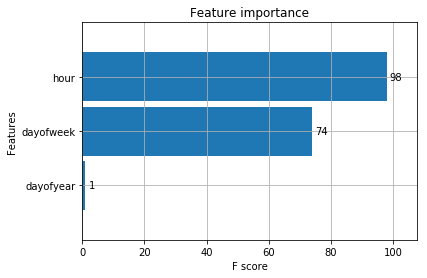

In [665]:
plot_importance(reg, height=0.9)

### prediction

In [666]:
pred = reg.predict(xgboost_MEXTLAMSS1_test)

### plots

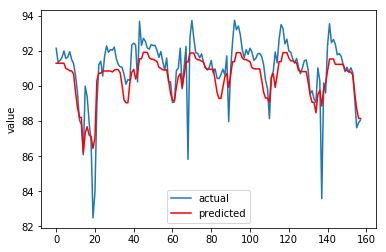

In [667]:
plt.plot(test_labels.values, label='actual')
plt.plot(pred, color='red', label='predicted')
plt.ylabel('value')
plt.legend()

### metrics

In [652]:
mean_squared_error(test_labels.values, pred)

1.344164337904645

##### mse is 1.34

In [653]:
mean_absolute_error(test_labels.values, pred)

0.823427440788172

##### mae is 0.82

### So lets now predict for the next 3 days 3/11/2018 to 6/11/2018

In [654]:
pred = reg.predict(forecast_df)

In [655]:
test_values = list(test_labels.values)
forecasted_values = list(pred)

print(len(test_values))
print(len(forecasted_values))

158
96


In [656]:
test_and_forecasted = test_values + forecasted_values

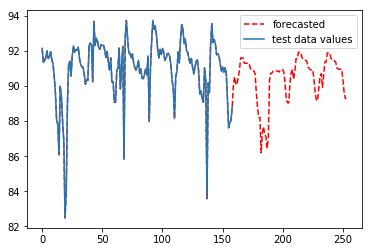

In [658]:
fig, ax = plt.subplots()
ax.plot(test_and_forecasted, 'r--',label='forecasted')
ax.plot(test_and_forecasted[0:159], label='test data values', )
plt.legend()

# Therefore we have forecasted the value for all the 5 network devices

# Results and discussions

###### The above is the detailed report of all the methods/algorithms I used to solve the problem of forecasting the value column for the next two days. Since this is a time series data, my first approach was to use statistical models such as AR, ARIMA etc. After trying with both of them, I got to know that their results were bad by their prediction plots of the test data. Next I tried non linear models that use decision trees as based learners. Decision trees are a tree based algorithm which splits the tree based on the amount of entropy reduced or amount of information gained by a feature. Random forests regressor and XGBoost are advanced versions of Decision tree as they contain lot of decision trees(n_estimators is a hyperparameter and needs to be tuned). After starting to use non linear models, the predictions became good and hence we solved this problem using XGBoost regressor

##### Which metrics did I use?
##### Since what we are solving is a regression problem, I used mean absolute error and mean squared error as my error metric to express the results as other commonly used metrics such as accuracy, precision, recall are classification metrics and will not work with regression.


##### Why did I choose XGBoost regressor?
##### XGBoost regressor aka boosting is a form of Gradient boosted decision trees from sklearn. It generally performs better on all kind of problem equal to standard linear models if not better. It's very effective for this kind of time series prediction problem because every set of inputs are row sampled with replacement and column sampled without replacement. This method of feeding in input creates better generalization of model to our data and moreover our model is trained on difference between actual valuse and predicted values during training which is very similar to moving averages model but in a better manner. Decision trees are the base learners in XGBoost with shallow depth and so they start with high bias, low variance and end up having reduced bias,low variance. Considering all the above positive facts about the model, I chose XGBoost regressor to solve this problem

##### Forecast plots
##### All my forecast plots have been plotted along with history on the XGBoost predicition for each of the network device above as you may have noticed


##### Note:
##### The code I have written above can be further optimized and repetability can be removed for better performance. The plots I had use here are simple and can be improved to better suit our needs if needed in future

#####                                                 ********THE END********